# IMPORTS:

In [ ]:
!pip install dalex -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.6.0-py3-none-any.whl size=1045995 sha256=877b231701086fa401680805d711dd86a248cd25518c30ee0006829fbd5c35fb
  Stored in directory: /root/.cache/pip/wheels/c8/45/19/f5810bf7c5ff9a476ebd89bb5b81a18ffcdf93931d17dbb0c1
Successfully built dalex


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=4e6ed15b2807e822ee2f836af4f9c49e838baea33a5b9411efeba6710c1a7ba0
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
#imports necesarios
import pandas as pd
import numpy as np
from sklearn import svm
from scipy.stats import ttest_rel
from sklearn.svm import LinearSVR, NuSVR
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, median_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, RepeatedKFold
from sklearn.inspection import permutation_importance
from scipy.io.arff import loadarff
import statsmodels.api as sm
from sklearn.utils import resample
import dalex as dx
import seaborn as sns

In [ ]:
# Función para evaluar el signo de los valores
def evaluar_valor(valor):
    if valor >= 0:
        return "Positivo"
    else:
        return "Negativo"

In [ ]:
# Crear las columnas del MultiIndex
columns = pd.MultiIndex.from_tuples([
    ('Breakdown', 'Ranking'), ('Breakdown', 'Signo'),
    ('Shapley', 'Ranking'), ('Shapley', 'Signo'),
    ('Lime', 'Ranking'), ('Lime', 'Signo')
])

# Dataset preprocesado:

In [ ]:
#carga del dataset
data=loadarff("/content/drive/MyDrive/TFM/miyazaki94.arff")
df = pd.DataFrame(data[0])

In [ ]:
df.head(20) #comprobar el dataframe

,ID,KLOC,SCRN,FORM,FILE,ESCRN,EFORM,EFILE,MM
0,b'A1',44.2,24.0,26.0,41.0,246.0,642.0,589.0,59.5
1,b'A2',59.0,34.0,30.0,28.0,651.0,447.0,1143.0,85.0
2,b'A3',36.9,9.0,36.0,29.0,193.0,694.0,995.0,31.5
3,b'B1',39.3,27.0,10.0,52.0,389.0,105.0,2344.0,58.9
4,b'B2',48.3,21.0,22.0,20.0,241.0,371.0,2052.0,58.9
5,b'B3',43.1,7.0,56.0,32.0,113.0,906.0,1816.0,67.3
6,b'C1',9.7,3.0,9.0,9.0,206.0,194.0,553.0,8.2
7,b'C2',13.7,12.0,8.0,12.0,214.0,266.0,496.0,13.9
8,b'C3',59.7,32.0,39.0,13.0,330.0,1189.0,477.0,36.0
9,b'D1',84.4,61.0,38.0,24.0,898.0,675.0,1313.0,89.5


In [ ]:
#comprobar si existen valores null o ?
print("¿Existen valores nulos?:", df.isnull().values.any())
print("¿Existen valores con '?' ?:", (df == '?').values.any())

¿Existen valores nulos?: False
¿Existen valores con '?' ?: False


In [ ]:
df=df.drop('ID', axis=1) #este atributo es un identificador por lo tanto lo elimino

In [ ]:
print(df.shape)
#obtener nombre de los atributos
print(list(df))
#obtener lista de atributos sin la variable dependiente
feature_names=list(df)
feature_names.remove('MM')
print(feature_names)

(48, 8)
['KLOC', 'SCRN', 'FORM', 'FILE', 'ESCRN', 'EFORM', 'EFILE', 'MM']
['KLOC', 'SCRN', 'FORM', 'FILE', 'ESCRN', 'EFORM', 'EFILE']


In [ ]:
df.info() #comprobar el tipo de variables y su cantidad. Parece que no hay ninguna variable objeto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KLOC    48 non-null     float64
 1   SCRN    48 non-null     float64
 2   FORM    48 non-null     float64
 3   FILE    48 non-null     float64
 4   ESCRN   48 non-null     float64
 5   EFORM   48 non-null     float64
 6   EFILE   48 non-null     float64
 7   MM      48 non-null     float64
dtypes: float64(8)
memory usage: 3.1 KB


In [ ]:
pd.set_option('display.max_columns', None)
df.describe() #obtener algunas estadísitcas de cada atributo

,KLOC,SCRN,FORM,FILE,ESCRN,EFORM,EFILE,MM
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,70.791667,33.687500,22.375000,34.812500,525.604167,460.666667,1854.583333,87.475000
std,87.567795,47.236461,20.548464,53.364526,626.058040,396.816069,6398.604691,228.759743
min,6.900000,0.000000,0.000000,2.000000,0.000000,0.000000,57.000000,5.600000
25%,24.825000,9.000000,9.000000,11.500000,127.250000,180.500000,480.750000,26.375000
50%,45.400000,23.500000,16.000000,24.500000,322.500000,342.500000,872.500000,38.100000
75%,65.300000,36.250000,31.000000,39.500000,604.250000,636.750000,1318.000000,58.950000
max,417.600000,281.000000,91.000000,370.000000,3000.000000,1566.000000,45000.000000,1586.000000


In [ ]:
correlation_matrix=df.corr()
print(correlation_matrix) #coeficientes de correlación

           KLOC      SCRN      FORM      FILE     ESCRN     EFORM     EFILE  \
KLOC   1.000000  0.845314  0.802104  0.722210  0.788582  0.596245  0.627242   
SCRN   0.845314  1.000000  0.609703  0.842135  0.856816  0.378424  0.800860   
FORM   0.802104  0.609703  1.000000  0.591315  0.572657  0.840370  0.526730   
FILE   0.722210  0.842135  0.591315  1.000000  0.671792  0.320506  0.954511   
ESCRN  0.788582  0.856816  0.572657  0.671792  1.000000  0.547414  0.618914   
EFORM  0.596245  0.378424  0.840370  0.320506  0.547414  1.000000  0.264602   
EFILE  0.627242  0.800860  0.526730  0.954511  0.618914  0.264602  1.000000   
MM     0.735055  0.842066  0.626092  0.958175  0.651625  0.340867  0.975164   

             MM  
KLOC   0.735055  
SCRN   0.842066  
FORM   0.626092  
FILE   0.958175  
ESCRN  0.651625  
EFORM  0.340867  
EFILE  0.975164  
MM     1.000000  


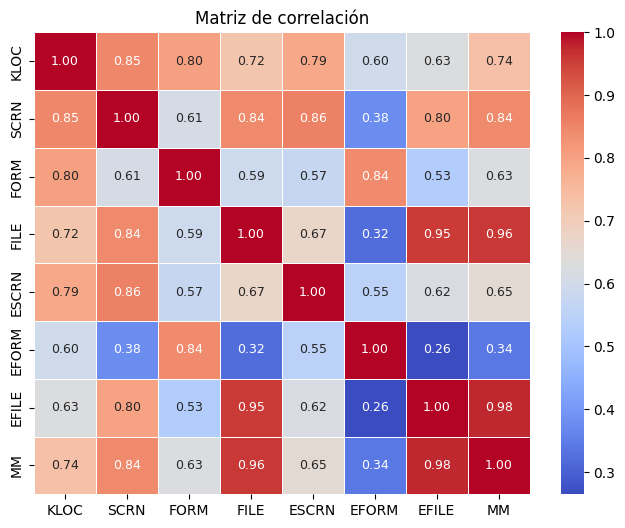

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 9}, linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()

In [ ]:
# Pares de atributos con correlación superior a 0.95
high_correlation_pairs = []
atributos = []

# Recorre la matriz de correlación y verifica los valores
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.80:
            attribute_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            high_correlation_pairs.append(attribute_pair)

# Imprime los pares de atributos con correlación superior a 0.80 y crear una lista de atributos sin repetir
for pair in high_correlation_pairs:
    print("Correlación alta entre: ", pair[0], "y", pair[1])
    atributos.extend(pair)

# Eliminar duplicados y mantener el orden
atributos = list(dict.fromkeys(atributos))
atributos.remove('MM') # eliminamos la variable de salida

# Imprimir la lista de atributos
print("Lista de atributos con correlación alta: ", atributos)

Correlación alta entre:  KLOC y SCRN
Correlación alta entre:  KLOC y FORM
Correlación alta entre:  SCRN y FILE
Correlación alta entre:  SCRN y ESCRN
Correlación alta entre:  SCRN y EFILE
Correlación alta entre:  SCRN y MM
Correlación alta entre:  FORM y EFORM
Correlación alta entre:  FILE y EFILE
Correlación alta entre:  FILE y MM
Correlación alta entre:  EFILE y MM
Lista de atributos con correlación alta:  ['KLOC', 'SCRN', 'FORM', 'FILE', 'ESCRN', 'EFILE', 'EFORM']


**VALIDACIÓN CRUZADA PARA COMPROBAR EL EFECTO DE LOS PARÁMETROS:**

In [ ]:
# Defino los algoritmos base para evaluar
reg_svr=svm.SVR()
rfr=RandomForestRegressor()
knnr=KNeighborsRegressor()
reg_gbr=GradientBoostingRegressor()
votr=VotingRegressor([('svr',reg_svr),('rf',rfr),('gbr',reg_gbr),('knn',knnr)])
modelos=[reg_svr, rfr, reg_gbr, knnr, votr]

In [ ]:
for i in atributos:
  print("\n##########################################################################################################")
  print("\nPARA EL ATRIBUTO: ", i)
  # Preparando los datos
  x=df[feature_names].values
  y=df['MM'].values

  alg_escalado = StandardScaler(with_mean=True, with_std=True)
  x_escalado = alg_escalado.fit_transform(x)
  y=y.reshape(-1,1)
  y_escalado = alg_escalado.fit_transform(y)

  df_x_transf = pd.DataFrame(x_escalado, columns=feature_names)
  df_y_transf = pd.DataFrame(y_escalado, columns=['MM'])
  df_data_transf = pd.concat([df_x_transf, df_y_transf], axis=1)

  X=df_data_transf[feature_names]
  Y=df_data_transf['MM']

  x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=42)
  x_train_sin=x_train.drop(i, axis=1)

  for j in modelos:
    # Realizar validación cruzada con y sin el atributo con alta correlación:
    # Con el atributo
    cv_scores_con = cross_val_score(j, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Sin el atributo
    cv_scores_sin = cross_val_score(j, x_train_sin, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calcular el estadístico t y el p-valor
    t_statistic, p_value = ttest_rel(cv_scores_con, cv_scores_sin)

    # Mostrar los resultados
    print("-------------------------------------------------------------------------------------------------------------")
    print("El modelo: ", j)
    print("MSE de validación cruzada (con atributo):", cv_scores_con)
    print("MSE de validación cruzada (sin atributo):", cv_scores_sin)
    print("El MSE medio con atributo es: ", np.mean(cv_scores_con), "\nEl MSE medio sin atributo es: ", np.mean(cv_scores_sin))
    if np.mean(cv_scores_con) > np.mean(cv_scores_sin):
      print("El atributo mejora el desempeño del modelo, con una diferencia de: ", np.mean(cv_scores_con)-np.mean(cv_scores_sin))
    else:
      print("El atributo no mejora el desempeño del modelo, con una diferencia de: ", np.mean(cv_scores_con)-np.mean(cv_scores_sin))

    print("Estadístico t:", t_statistic)
    print("p-valor:", p_value)


##########################################################################################################

PARA EL ATRIBUTO:  FILE
-------------------------------------------------------------------------------------------------------------
El modelo:  SVR()
MSE de validación cruzada (con atributo): [-5.50887308e-02 -6.31490734e+00 -1.36149315e-02 -3.63222806e-03
 -1.47792859e-02]
MSE de validación cruzada (sin atributo): [-5.45697440e-02 -6.31285269e+00 -1.30086335e-02 -5.05393299e-03
 -1.52313388e-02]
El MSE medio con atributo es:  -1.2804045040516565 
El MSE medio sin atributo es:  -1.2801432669294446
El atributo no mejora el desempeño del modelo, con una diferencia de:  -0.0002612371222119325
Estadístico t: -0.44990960368693866
p-valor: 0.6760802954762426
-------------------------------------------------------------------------------------------------------------
El modelo:  RandomForestRegressor()
MSE de validación cruzada (con atributo): [-0.22061084 -5.65799828 -0.00766181 -0.

In [ ]:
#estos atributos tienen alta correlación, por lo tanto los elimino
feature_names.remove('FILE')
#feature_names.remove('EFILE')
print(feature_names)

['KLOC', 'SCRN', 'FORM', 'ESCRN', 'EFORM', 'EFILE']


In [ ]:
df_final=df
df_final=df_final.drop("FILE", axis=1)
df_final.describe()

,KLOC,SCRN,FORM,ESCRN,EFORM,EFILE,MM
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,70.791667,33.687500,22.375000,525.604167,460.666667,1854.583333,87.475000
std,87.567795,47.236461,20.548464,626.058040,396.816069,6398.604691,228.759743
min,6.900000,0.000000,0.000000,0.000000,0.000000,57.000000,5.600000
25%,24.825000,9.000000,9.000000,127.250000,180.500000,480.750000,26.375000
50%,45.400000,23.500000,16.000000,322.500000,342.500000,872.500000,38.100000
75%,65.300000,36.250000,31.000000,604.250000,636.750000,1318.000000,58.950000
max,417.600000,281.000000,91.000000,3000.000000,1566.000000,45000.000000,1586.000000


In [ ]:
# Tomar los valores de la variable dependiente (y) y las independientes (x)
x=df[feature_names].values
y=df['MM'].values

#se realiza una normalización con el objetivo de obtener una distribución de media cero y varianza uno
alg_escalado = StandardScaler(with_mean=True, with_std=True)
x_escalado = alg_escalado.fit_transform(x)
y=y.reshape(-1,1) #es necesario que sea un array 1d
y_escalado = alg_escalado.fit_transform(y)
y_escalado=y_escalado.ravel() #para aplanar y_escalado

df_x_transf = pd.DataFrame(x_escalado, columns=feature_names)
df_y_transf = pd.DataFrame(y_escalado, columns=['MM'])
df_data_transf = pd.concat([df_x_transf, df_y_transf], axis=1)

X=df_data_transf[feature_names]
Y=df_data_transf['MM']

In [ ]:
#dividir en conjunto de entrenamiento y test 70%-30%
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=42)

# Algoritmos:

## **SVR :**

**GRIDSEARCHCV:**

In [ ]:
#Búsqueda combinacion de parámetros usando GridSearchCV
modelo=svm.SVR()
params={'kernel':['linear','poly', 'rbf', 'sigmoid'],'degree':[1,2,3,4],'gamma':['auto','scale'],'C':list(np.arange(0.5,21.5,1.0))}
score={'mae':'neg_mean_absolute_error','mse':'neg_mean_squared_error','R2':'r2'}

# Definir la validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=3)

grid=GridSearchCV(modelo,params,cv=cv,scoring='r2',verbose=1)
grid.fit(x_train,y_train)

Fitting 15 folds for each of 672 candidates, totalling 10080 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=SVR(),
             param_grid={'C': [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5,
                               10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5,
                               18.5, 19.5, 20.5],
                         'degree': [1, 2, 3, 4], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2', verbose=1)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'C': 0.5, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
SVR(C=0.5, degree=1)
-0.33468336765137596


In [ ]:
#definir algoritmo SVR con los mejores parámetros
svr = svm.SVR(C=0.5, degree=1)

In [ ]:
#entrenamiento
modelo_svr=svr.fit(x_train,y_train)

In [ ]:
#predicciones
y_pred = modelo_svr.predict(x_test)

**EVALUACIÓN MODELO:**

In [ ]:
#comprobación resultados
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
desv_pred= np.std(y_pred)
print(f'Desviación Estándar Predicciones: {desv_pred:.2f}')
media_pred= np.mean(y_pred)
print(f'Media Predicciones: {media_pred:.2f}')

      Actual  Predicted
27 -0.214146   0.170155
40 -0.140371  -0.208602
26  0.307138   0.316171
43 -0.359929  -0.237577
24 -0.147881  -0.142058
37 -0.289246  -0.208001
12  0.070793  -0.049065
19 -0.241977   0.080857
4  -0.126235  -0.177394
25 -0.222540  -0.156638
8  -0.227399   0.009618
3  -0.126235  -0.181441
6  -0.350210  -0.265976
39 -0.234909  -0.223158
33 -0.223423  -0.244542
Desviación Estándar Predicciones: 0.17
Media Predicciones: -0.10


In [ ]:
#calcular residuos
residuos = y_test - y_pred
print(residuos)

27   -0.384301
40    0.068231
26   -0.009033
43   -0.122352
24   -0.005823
37   -0.081246
12    0.119858
19   -0.322834
4     0.051159
25   -0.065901
8    -0.237017
3     0.055206
6    -0.084234
39   -0.011751
33    0.021119
Name: MM, dtype: float64


In [ ]:
#calcular métricas para evaluar el rendimiento del algoritmo
mbe=sm.tools.eval_measures.bias(y_test,y_pred)
print(f'Mean Bias Error: {mbe:.4f}')
mdbe=sm.tools.eval_measures.medianbias(y_test,y_pred)
print(f'Median Bias Error: {mdbe:.4f}')
max=sm.tools.eval_measures.maxabs(y_test,y_pred)
print(f'Maximum Absolute Error: {max:.4f}')
iqr=sm.tools.eval_measures.iqr(y_test,y_pred)
print(f'Interquartile Range of Error: {iqr:.4f}')
stde=sm.tools.eval_measures.stde(y_test,y_pred)
print(f'Standard Deviation of Error: {stde:.4f}')
vare=sm.tools.eval_measures.vare(y_test,y_pred)
print(f'Variance of Error: {vare:.4f}')

print("---------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmspe = sm.tools.eval_measures.rmspe(y_test,y_pred)
r2=r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Mean absolute error: {mae:.2f}')
print(f'Median absolute error: {mdae:.2f}')
print(f'Mean absolute percentage error: {mape:.2f} %')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f} %')
print(f'Coefficient of determination: {r2:.2f}')

print("---------------------------------------------------")
abs_residuos=abs(residuos)
n_residuos=len(residuos)
mre=abs_residuos/y_test
mmre=np.mean(mre)
mdmre=np.median(mre)
print(f'Mean Magnitude of Error: {mmre:.4f}')
print(f'Median Magnitude of Error: {mdmre:.4f}')
count = mre[mre <= 0.25].count()
pred_25 = (count / len(y_pred)) * 100
print(f'Percentage of Relative Error within 25%: {pred_25:.2f} %')

Mean Bias Error: -0.0673
Median Bias Error: -0.0118
Maximum Absolute Error: 0.3843
Interquartile Range of Error: 0.1054
Standard Deviation of Error: 0.1411
Variance of Error: 0.0199
---------------------------------------------------
Mean absolute error: 0.11
Median absolute error: 0.07
Mean absolute percentage error: 57.09 %
Mean squared error: 0.02
Root mean squared error: 0.16
Root mean squared percentage error: 8.12 %
Coefficient of determination: 0.07
---------------------------------------------------
Mean Magnitude of Error: -0.3412
Median Magnitude of Error: -0.2961
Percentage of Relative Error within 25%: 93.33 %


In [ ]:
modelo_svr.score(x_test, y_test)

0.06942529288524024

In [ ]:
modelo_svr.score(x_train, y_train)

0.2679589015839329

**VALIDACIÓN CRUZADA**

In [ ]:
# El número de folds
n_folds = 5

# Inicializar listas para almacenar las puntuaciones de las métricas. Nos centramos en las métricas comunes en la literatura: R2, MAE, MSE/RMSE, MMRE, PRED(25)
r2_scores = []
mae_scores= []
mse_scores = []
rmse_scores = []
mmre_scores = []
pred_25_scores = []

# Crear los objetos KFold
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(df_data_transf):
    # Dividir los datos en entrenamiento y prueba
    train_data = df_data_transf.iloc[train_index]
    test_data = df_data_transf.iloc[test_index]

    X_train = train_data[feature_names]
    Y_train = train_data['MM']
    X_test = test_data[feature_names]
    Y_test = test_data['MM']

    # Entrenar el modelo.
    cv_svr= svm.SVR(C=0.5, degree=1)
    cv_svr.fit(X_train, Y_train)

    # Realizar las predicciones en el conjunto de prueba
    Y_pred = cv_svr.predict(X_test)

    # Cálculo de residuos
    residuos = Y_test - Y_pred

    # Calcular las métricas
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(Y_test, Y_pred)
    abs_residuos=abs(residuos)
    n_residuos=len(residuos)
    mre=abs_residuos/Y_test
    mmre=np.mean(mre)
    count = mre[mre <= 0.25].count()
    pred_25 = (count / len(Y_pred)) * 100

    # Agregar las puntuaciones a las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mmre_scores.append(mmre)
    pred_25_scores.append(pred_25)

# Calcular la media de las puntuaciones
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mmre = np.mean(mmre_scores)
mean_pred_25 = np.mean(pred_25_scores)

print(f'CV Mean absolute error: {mean_mae:.2f}')
print(f'CV Mean squared error: {mean_mse:.2f}')
print(f'CV Root mean squared error: {mean_rmse:.2f}')
print(f'CV Coefficient of determination: {mean_r2:.2f}')
print(f'CV Mean Magnitude of Error: {mean_mmre:.4f}')
print(f'CV Percentage of Relative Error within 25%: {mean_pred_25:.2f} %')

CV Mean absolute error: 0.26
CV Mean squared error: 1.00
CV Root mean squared error: 0.54
CV Coefficient of determination: 0.37
CV Mean Magnitude of Error: -0.1371
CV Percentage of Relative Error within 25%: 85.33 %


In [ ]:
cv_results = cross_validate(svr, X, Y, cv=5, scoring=('neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error','r2'))

In [ ]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [ ]:
print("Error Absoluto Medio: ", cv_results['test_neg_mean_absolute_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_absolute_error']))
print("Error Cuadrático Medio: " , cv_results['test_neg_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_squared_error']))
print("Raiz Error Cuadrático Medio: ", cv_results['test_neg_root_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Coeficiente de Determinación: ", cv_results['test_r2'], " // Con una media de: ", np.mean(cv_results['test_r2']))

Error Absoluto Medio:  [-0.09364801 -0.17832741 -0.07675857 -0.87926111 -0.08250628]  // Con una media de:  -0.2621002772066686
Error Cuadrático Medio:  [-0.01042604 -0.04175843 -0.00964969 -4.90819144 -0.0108365 ]  // Con una media de:  -0.9961724188296553
Raiz Error Cuadrático Medio:  [-0.10210796 -0.20434879 -0.09823285 -2.21544385 -0.10409849]  // Con una media de:  -0.5448463882062646
Coeficiente de Determinación:  [ 0.22734749  0.36156897  0.82898155 -0.06883126  0.47883783]  // Con una media de:  0.36558091647256397


In [ ]:
score_result={"Modelo":["SVR"],"MAE":[mean_mae], "MSE":[mean_mse], "RMSE":[mean_rmse], "R2":[mean_r2], "MMRE":[abs(mean_mmre)], "PRED(0.25)":[mean_pred_25/100]}
score_result=pd.DataFrame(score_result)

In [ ]:
score_result

,Modelo,MAE,MSE,RMSE,R2,MMRE,PRED(0.25)
0,SVR,0.2621,0.996172,0.544846,0.365581,0.137118,0.853333


## **RandomForest:**

In [ ]:
modelo=RandomForestRegressor(random_state=42)
params={'n_estimators':[100,200,400],'criterion':["squared_error", "absolute_error"],'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,2,3],'bootstrap':[True,False],'max_depth':[None,1,3,5]}
score={'mae':'neg_mean_absolute_error','rmse':'neg_root_mean_squared_error','R2':'r2'}

# Definir la validación cruzada repetida
cv = RepeatedKFold(n_splits=3, n_repeats=3)

grid=GridSearchCV(modelo,params,cv=cv,scoring='r2',verbose=1)
grid.fit(x_train,y_train)

Fitting 9 folds for each of 576 candidates, totalling 5184 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=3, random_state=None),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 1, 3, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 400]},
             scoring='r2', verbose=1)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestRegressor(max_depth=3, random_state=42)
0.2758883650210012


In [ ]:
rf = RandomForestRegressor(max_depth=3, random_state=42)

In [ ]:
modelo_rf=rf.fit(x_train,y_train)

In [ ]:
y_pred = modelo_rf.predict(x_test)

**EVALUACIÓN MODELO:**

In [ ]:
#comprobación resultados
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
desv_pred= np.std(y_pred)
print(f'Desviación Estándar Predicciones: {desv_pred:.2f}')
media_pred= np.mean(y_pred)
print(f'Media Predicciones: {media_pred:.2f}')

      Actual  Predicted
27 -0.214146   0.031565
40 -0.140371  -0.201289
26  0.307138   0.589006
43 -0.359929  -0.281629
24 -0.147881  -0.200965
37 -0.289246  -0.274739
12  0.070793  -0.191734
19 -0.241977  -0.045598
4  -0.126235  -0.056741
25 -0.222540  -0.172774
8  -0.227399  -0.075465
3  -0.126235  -0.073278
6  -0.350210  -0.291957
39 -0.234909  -0.224353
33 -0.223423  -0.280507
Desviación Estándar Predicciones: 0.21
Media Predicciones: -0.12


In [ ]:
residuos = y_test - y_pred
print(residuos)

27   -0.245711
40    0.060918
26   -0.281869
43   -0.078299
24    0.053084
37   -0.014507
12    0.262527
19   -0.196379
4    -0.069494
25   -0.049765
8    -0.151934
3    -0.052956
6    -0.058253
39   -0.010556
33    0.057084
Name: MM, dtype: float64


In [ ]:
#calcular métricas para evaluar el rendimiento del algoritmo
mbe=sm.tools.eval_measures.bias(y_test,y_pred)
print(f'Mean Bias Error: {mbe:.4f}')
mdbe=sm.tools.eval_measures.medianbias(y_test,y_pred)
print(f'Median Bias Error: {mdbe:.4f}')
max=sm.tools.eval_measures.maxabs(y_test,y_pred)
print(f'Maximum Absolute Error: {max:.4f}')
iqr=sm.tools.eval_measures.iqr(y_test,y_pred)
print(f'Interquartile Range of Error: {iqr:.4f}')
stde=sm.tools.eval_measures.stde(y_test,y_pred)
print(f'Standard Deviation of Error: {stde:.4f}')
vare=sm.tools.eval_measures.vare(y_test,y_pred)
print(f'Variance of Error: {vare:.4f}')

print("---------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmspe = sm.tools.eval_measures.rmspe(y_test,y_pred)
r2=r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Mean absolute error: {mae:.2f}')
print(f'Median absolute error: {mdae:.2f}')
print(f'Mean absolute percentage error: {mape:.2f} %')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f} %')
print(f'Coefficient of determination: {r2:.2f}')

print("---------------------------------------------------")
abs_residuos=abs(residuos)
n_residuos=len(residuos)
mre=abs_residuos/y_test
mmre=np.mean(mre)
mdmre=np.median(mre)
print(f'Mean Magnitude of Error: {mmre:.4f}')
print(f'Median Magnitude of Error: {mdmre:.4f}')
count = mre[mre <= 0.25].count()
pred_25 = (count / len(y_pred)) * 100
print(f'Percentage of Relative Error within 25%: {pred_25:.2f} %')

Mean Bias Error: -0.0517
Median Bias Error: -0.0530
Maximum Absolute Error: 0.2819
Interquartile Range of Error: 0.0677
Standard Deviation of Error: 0.1317
Variance of Error: 0.0173
---------------------------------------------------
Mean absolute error: 0.11
Median absolute error: 0.06
Mean absolute percentage error: 66.50 %
Mean squared error: 0.02
Root mean squared error: 0.14
Root mean squared percentage error: 10.96 %
Coefficient of determination: 0.24
---------------------------------------------------
Mean Magnitude of Error: -0.0481
Median Magnitude of Error: -0.2555
Percentage of Relative Error within 25%: 86.67 %


In [ ]:
modelo_rf.score(x_test, y_test)

0.23788881296561015

In [ ]:
modelo_rf.score(x_train, y_train)

0.9183360962528243

**VALIDACIÓN CRUZADA:**

In [ ]:
# El número de folds
n_folds = 5

# Inicializar listas para almacenar las puntuaciones de las métricas. Nos centramos en las métricas comunes en la literatura: R2, MAE, MSE/RMSE, MMRE, PRED(25)
r2_scores = []
mae_scores= []
mse_scores = []
rmse_scores = []
mmre_scores = []
pred_25_scores = []

# Crear los objetos KFold
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(df_data_transf):
    # Dividir los datos en entrenamiento y prueba
    train_data = df_data_transf.iloc[train_index]
    test_data = df_data_transf.iloc[test_index]

    X_train = train_data[feature_names]
    Y_train = train_data['MM']
    X_test = test_data[feature_names]
    Y_test = test_data['MM']

    # Entrenar el modelo.
    cv_rf=RandomForestRegressor(max_depth=3, random_state=42)
    cv_rf.fit(X_train, Y_train)

    # Realizar las predicciones en el conjunto de prueba
    Y_pred = cv_rf.predict(X_test)

    # Cálculo de residuos
    residuos = Y_test - Y_pred

    # Calcular las métricas
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(Y_test, Y_pred)
    abs_residuos=abs(residuos)
    n_residuos=len(residuos)
    mre=abs_residuos/Y_test
    mmre=np.mean(mre)
    count = mre[mre <= 0.25].count()
    pred_25 = (count / len(Y_pred)) * 100

    # Agregar las puntuaciones a las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mmre_scores.append(mmre)
    pred_25_scores.append(pred_25)

# Calcular la media de las puntuaciones
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mmre = np.mean(mmre_scores)
mean_pred_25 = np.mean(pred_25_scores)

print(f'CV Mean absolute error: {mean_mae:.2f}')
print(f'CV Mean squared error: {mean_mse:.2f}')
print(f'CV Root mean squared error: {mean_rmse:.2f}')
print(f'CV Coefficient of determination: {mean_r2:.2f}')
print(f'CV Mean Magnitude of Error: {mean_mmre:.4f}')
print(f'CV Percentage of Relative Error within 25%: {mean_pred_25:.2f} %')

CV Mean absolute error: 0.26
CV Mean squared error: 0.91
CV Root mean squared error: 0.55
CV Coefficient of determination: 0.21
CV Mean Magnitude of Error: -0.2465
CV Percentage of Relative Error within 25%: 85.33 %


In [ ]:
cv_results = cross_validate(rf, X, Y, cv=5, scoring=('neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error','r2'))

In [ ]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [ ]:
print("Error Absoluto Medio: ", cv_results['test_neg_mean_absolute_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_absolute_error']))
print("Error Cuadrático Medio: " , cv_results['test_neg_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_squared_error']))
print("Raiz Error Cuadrático Medio: ", cv_results['test_neg_root_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Coeficiente de Determinación: ", cv_results['test_r2'], " // Con una media de: ", np.mean(cv_results['test_r2']))

Error Absoluto Medio:  [-0.10031221 -0.16978762 -0.08711147 -0.85099121 -0.07383024]  // Con una media de:  -0.2564065491702445
Error Cuadrático Medio:  [-0.0145449  -0.07165123 -0.01994352 -4.41789203 -0.00965801]  // Con una media de:  -0.9067379383268721
Raiz Error Cuadrático Medio:  [-0.12060226 -0.26767748 -0.14122151 -2.10187821 -0.09827518]  // Con una media de:  -0.5459309275495898
Coeficiente de Determinación:  [-0.07789362 -0.0954524   0.64654743  0.03793868  0.53551501]  // Con una media de:  0.20933102260383


In [ ]:
score_result=score_result.append({"Modelo":"RandomForest","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)

<ipython-input-34-06667e9c6bdf>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_result=score_result.append({"Modelo":"RandomForest","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)


## **GradientBoostingRegresor:**

In [ ]:
#Búsqueda combinacion de parámetros usando GridSearchCV
modelo=GradientBoostingRegressor(random_state=42)
params={'loss':['squared_error', 'absolute_error'],'learning_rate':[0.1,0.3,0.5],'n_estimators':[100,300,500],'criterion':['friedman_mse','squared_error'],'min_samples_split':[2,3,4],'min_samples_leaf':[1,3,5],'max_depth':[None,1,3]}
score={'mae':'neg_mean_absolute_error','mse':'neg_mean_squared_error','R2':'r2'}

# Definir la validación cruzada repetida
cv = RepeatedKFold(n_splits=3, n_repeats=3)

grid=GridSearchCV(modelo,params,cv=cv,scoring='r2',verbose=1)
grid.fit(x_train,y_train)

Fitting 9 folds for each of 972 candidates, totalling 8748 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=3, random_state=None),
             estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.3, 0.5],
                         'loss': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 1, 3],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 300, 500]},
             scoring='r2', verbose=1)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
GradientBoostingRegressor(loss='absolute_error', random_state=42)
0.4042236198178893


In [ ]:
gbr=GradientBoostingRegressor(loss='absolute_error', random_state=42)

In [ ]:
modelo_gbr=gbr.fit(x_train,y_train)

In [ ]:
y_pred = modelo_gbr.predict(x_test)

**EVALUACIÓN MODELO:**

In [ ]:
#comprobación resultados
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
desv_pred= np.std(y_pred)
print(f'Desviación Estándar Predicciones: {desv_pred:.2f}')
media_pred= np.mean(y_pred)
print(f'Media Predicciones: {media_pred:.2f}')

      Actual  Predicted
27 -0.214146  -0.008792
40 -0.140371  -0.165669
26  0.307138   0.508192
43 -0.359929  -0.298000
24 -0.147881  -0.079179
37 -0.289246  -0.235672
12  0.070793   0.015377
19 -0.241977   0.103762
4  -0.126235   0.049955
25 -0.222540  -0.184059
8  -0.227399  -0.039500
3  -0.126235  -0.035799
6  -0.350210  -0.350945
39 -0.234909  -0.233449
33 -0.223423  -0.299648
Desviación Estándar Predicciones: 0.21
Media Predicciones: -0.08


In [ ]:
residuos = y_test - y_pred
print(residuos)

27   -0.205354
40    0.025298
26   -0.201055
43   -0.061929
24   -0.068702
37   -0.053575
12    0.055416
19   -0.345739
4    -0.176190
25   -0.038480
8    -0.187899
3    -0.090436
6     0.000735
39   -0.001460
33    0.076225
Name: MM, dtype: float64


In [ ]:
#calcular métricas para evaluar el rendimiento del algoritmo
mbe=sm.tools.eval_measures.bias(y_test,y_pred)
print(f'Mean Bias Error: {mbe:.4f}')
mdbe=sm.tools.eval_measures.medianbias(y_test,y_pred)
print(f'Median Bias Error: {mdbe:.4f}')
max=sm.tools.eval_measures.maxabs(y_test,y_pred)
print(f'Maximum Absolute Error: {max:.4f}')
iqr=sm.tools.eval_measures.iqr(y_test,y_pred)
print(f'Interquartile Range of Error: {iqr:.4f}')
stde=sm.tools.eval_measures.stde(y_test,y_pred)
print(f'Standard Deviation of Error: {stde:.4f}')
vare=sm.tools.eval_measures.vare(y_test,y_pred)
print(f'Variance of Error: {vare:.4f}')

print("---------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmspe = sm.tools.eval_measures.rmspe(y_test,y_pred)
r2=r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Mean absolute error: {mae:.2f}')
print(f'Median absolute error: {mdae:.2f}')
print(f'Mean absolute percentage error: {mape:.2f} %')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f} %')
print(f'Coefficient of determination: {r2:.2f}')

print("---------------------------------------------------")
abs_residuos=abs(residuos)
n_residuos=len(residuos)
mre=abs_residuos/y_test
mmre=np.mean(mre)
mdmre=np.median(mre)
print(f'Mean Magnitude of Error: {mmre:.4f}')
print(f'Median Magnitude of Error: {mdmre:.4f}')
count = mre[mre <= 0.25].count()
pred_25 = (count / len(y_pred)) * 100
print(f'Percentage of Relative Error within 25%: {pred_25:.2f} %')

Mean Bias Error: -0.0849
Median Bias Error: -0.0619
Maximum Absolute Error: 0.3457
Interquartile Range of Error: 0.1747
Standard Deviation of Error: 0.1128
Variance of Error: 0.0127
---------------------------------------------------
Mean absolute error: 0.11
Median absolute error: 0.07
Mean absolute percentage error: 55.25 %
Mean squared error: 0.02
Root mean squared error: 0.14
Root mean squared percentage error: 7.12 %
Coefficient of determination: 0.24
---------------------------------------------------
Mean Magnitude of Error: -0.3609
Median Magnitude of Error: -0.1852
Percentage of Relative Error within 25%: 86.67 %


In [ ]:
modelo_gbr.score(x_test, y_test)

0.24055678838641692

In [ ]:
modelo_gbr.score(x_train, y_train)

0.45596745963759644

**VALIDACIÓN CRUZADA:**

In [ ]:
# El número de folds
n_folds = 5

# Inicializar listas para almacenar las puntuaciones de las métricas. Nos centramos en las métricas comunes en la literatura: R2, MAE, MSE/RMSE, MMRE, PRED(25)
r2_scores = []
mae_scores= []
mse_scores = []
rmse_scores = []
mmre_scores = []
pred_25_scores = []

# Crear los objetos KFold
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(df_data_transf):
    # Dividir los datos en entrenamiento y prueba
    train_data = df_data_transf.iloc[train_index]
    test_data = df_data_transf.iloc[test_index]

    X_train = train_data[feature_names]
    Y_train = train_data['MM']
    X_test = test_data[feature_names]
    Y_test = test_data['MM']

    # Entrenar el modelo.
    cv_gbr=GradientBoostingRegressor(loss='absolute_error', random_state=42)
    cv_gbr.fit(X_train, Y_train)

    # Realizar las predicciones en el conjunto de prueba
    Y_pred = cv_gbr.predict(X_test)

    # Cálculo de residuos
    residuos = Y_test - Y_pred

    # Calcular las métricas
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(Y_test, Y_pred)
    abs_residuos=abs(residuos)
    n_residuos=len(residuos)
    mre=abs_residuos/Y_test
    mmre=np.mean(mre)
    count = mre[mre <= 0.25].count()
    pred_25 = (count / len(Y_pred)) * 100

    # Agregar las puntuaciones a las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mmre_scores.append(mmre)
    pred_25_scores.append(pred_25)

# Calcular la media de las puntuaciones
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mmre = np.mean(mmre_scores)
mean_pred_25 = np.mean(pred_25_scores)

print(f'CV Mean absolute error: {mean_mae:.2f}')
print(f'CV Mean squared error: {mean_mse:.2f}')
print(f'CV Root mean squared error: {mean_rmse:.2f}')
print(f'CV Coefficient of determination: {mean_r2:.2f}')
print(f'CV Mean Magnitude of Error: {mean_mmre:.4f}')
print(f'CV Percentage of Relative Error within 25%: {mean_pred_25:.2f} %')

CV Mean absolute error: 0.25
CV Mean squared error: 0.93
CV Root mean squared error: 0.54
CV Coefficient of determination: 0.31
CV Mean Magnitude of Error: -0.1953
CV Percentage of Relative Error within 25%: 85.33 %


In [ ]:
cv_results = cross_validate(gbr, X, Y, cv=5, scoring=('neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error','r2'))

In [ ]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [ ]:
print("Error Absoluto Medio: ", cv_results['test_neg_mean_absolute_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_absolute_error']))
print("Error Cuadrático Medio: " , cv_results['test_neg_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_squared_error']))
print("Raiz Error Cuadrático Medio: ", cv_results['test_neg_root_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Coeficiente de Determinación: ", cv_results['test_r2'], " // Con una media de: ", np.mean(cv_results['test_r2']))

Error Absoluto Medio:  [-0.07381085 -0.16615373 -0.07666609 -0.84762584 -0.06347357]  // Con una media de:  -0.24554601724558262
Error Cuadrático Medio:  [-0.00960411 -0.06716033 -0.01246835 -4.52655075 -0.01044554]  // Con una media de:  -0.9252458167124384
Raiz Error Cuadrático Medio:  [-0.09800056 -0.25915311 -0.11166176 -2.12756921 -0.10220342]  // Con una media de:  -0.5397176104074728
Coeficiente de Determinación:  [ 0.28825879 -0.0267925   0.77902743  0.01427664  0.49764026]  // Con una media de:  0.31048212224214466


In [ ]:
score_result=score_result.append({"Modelo":"GradientBoosting","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)

<ipython-input-42-0f69b13d04a5>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_result=score_result.append({"Modelo":"GradientBoosting","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)


## **Voting:**

In [ ]:
reg_vot=VotingRegressor(estimators=[('rf',rf),('SVR',svr),('gbr',gbr)])

In [ ]:
modelo_voting=reg_vot.fit(x_train,y_train)

In [ ]:
y_pred = modelo_voting.predict(x_test)

**EVALUACIÓN MODELO:**

In [ ]:
#comprobación resultados
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
desv_pred= np.std(y_pred)
print(f'Desviación Estándar Predicciones: {desv_pred:.2f}')
media_pred= np.mean(y_pred)
print(f'Media Predicciones: {media_pred:.2f}')

      Actual  Predicted
27 -0.214146   0.064309
40 -0.140371  -0.191854
26  0.307138   0.471123
43 -0.359929  -0.272402
24 -0.147881  -0.140734
37 -0.289246  -0.239470
12  0.070793  -0.075141
19 -0.241977   0.046340
4  -0.126235  -0.061393
25 -0.222540  -0.171157
8  -0.227399  -0.035116
3  -0.126235  -0.096839
6  -0.350210  -0.302959
39 -0.234909  -0.226987
33 -0.223423  -0.274899
Desviación Estándar Predicciones: 0.19
Media Predicciones: -0.10


In [ ]:
residuos = y_test - y_pred
print(residuos)

27   -0.278455
40    0.051483
26   -0.163985
43   -0.087527
24   -0.007147
37   -0.049776
12    0.145934
19   -0.288318
4    -0.064841
25   -0.051382
8    -0.192283
3    -0.029395
6    -0.047251
39   -0.007922
33    0.051476
Name: MM, dtype: float64


In [ ]:
#calcular métricas para evaluar el rendimiento del algoritmo
mbe=sm.tools.eval_measures.bias(y_test,y_pred)
print(f'Mean Bias Error: {mbe:.4f}')
mdbe=sm.tools.eval_measures.medianbias(y_test,y_pred)
print(f'Median Bias Error: {mdbe:.4f}')
max=sm.tools.eval_measures.maxabs(y_test,y_pred)
print(f'Maximum Absolute Error: {max:.4f}')
iqr=sm.tools.eval_measures.iqr(y_test,y_pred)
print(f'Interquartile Range of Error: {iqr:.4f}')
stde=sm.tools.eval_measures.stde(y_test,y_pred)
print(f'Standard Deviation of Error: {stde:.4f}')
vare=sm.tools.eval_measures.vare(y_test,y_pred)
print(f'Variance of Error: {vare:.4f}')

print("---------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmspe = sm.tools.eval_measures.rmspe(y_test,y_pred)
r2=r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Mean absolute error: {mae:.2f}')
print(f'Median absolute error: {mdae:.2f}')
print(f'Mean absolute percentage error: {mape:.2f} %')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f} %')
print(f'Coefficient of determination: {r2:.2f}')

print("---------------------------------------------------")
abs_residuos=abs(residuos)
n_residuos=len(residuos)
mre=abs_residuos/y_test
mmre=np.mean(mre)
mdmre=np.median(mre)
print(f'Mean Magnitude of Error: {mmre:.4f}')
print(f'Median Magnitude of Error: {mdmre:.4f}')
count = mre[mre <= 0.25].count()
pred_25 = (count / len(y_pred)) * 100
print(f'Percentage of Relative Error within 25%: {pred_25:.2f} %')

Mean Bias Error: -0.0680
Median Bias Error: -0.0498
Maximum Absolute Error: 0.2883
Interquartile Range of Error: 0.0796
Standard Deviation of Error: 0.1161
Variance of Error: 0.0135
---------------------------------------------------
Mean absolute error: 0.10
Median absolute error: 0.05
Mean absolute percentage error: 54.26 %
Mean squared error: 0.02
Root mean squared error: 0.13
Root mean squared percentage error: 7.76 %
Coefficient of determination: 0.31
---------------------------------------------------
Mean Magnitude of Error: -0.1966
Median Magnitude of Error: -0.2309
Percentage of Relative Error within 25%: 86.67 %


In [ ]:
modelo_voting.score(x_test, y_test)

0.3110636564039271

In [ ]:
modelo_voting.score(x_train, y_train)

0.610368691773813

**VALIDACIÓN CRUZADA:**

In [ ]:
# El número de folds
n_folds = 5

# Inicializar listas para almacenar las puntuaciones de las métricas. Nos centramos en las métricas comunes en la literatura: R2, MAE, MSE/RMSE, MMRE, PRED(25)
r2_scores = []
mae_scores= []
mse_scores = []
rmse_scores = []
mmre_scores = []
pred_25_scores = []

# Crear los objetos KFold
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(df_data_transf):
    # Dividir los datos en entrenamiento y prueba
    train_data = df_data_transf.iloc[train_index]
    test_data = df_data_transf.iloc[test_index]

    X_train = train_data[feature_names]
    Y_train = train_data['MM']
    X_test = test_data[feature_names]
    Y_test = test_data['MM']

    # Entrenar el modelo.
    cv_vot=VotingRegressor(estimators=[('rf',rf),('SVR',svr),('gbr',gbr)])
    cv_vot.fit(X_train, Y_train)

    # Realizar las predicciones en el conjunto de prueba
    Y_pred = cv_vot.predict(X_test)

    # Cálculo de residuos
    residuos = Y_test - Y_pred

    # Calcular las métricas
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(Y_test, Y_pred)
    abs_residuos=abs(residuos)
    n_residuos=len(residuos)
    mre=abs_residuos/Y_test
    mmre=np.mean(mre)
    count = np.sum(mre <= 0.25)
    pred_25 = (count / len(Y_pred)) * 100

    # Agregar las puntuaciones a las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mmre_scores.append(mmre)
    pred_25_scores.append(pred_25)

# Calcular la media de las puntuaciones
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mmre = np.mean(mmre_scores)
mean_pred_25 = np.mean(pred_25_scores)

print(f'CV Mean absolute error: {mean_mae:.2f}')
print(f'CV Mean squared error: {mean_mse:.2f}')
print(f'CV Root mean squared error: {mean_rmse:.2f}')
print(f'CV Coefficient of determination: {mean_r2:.2f}')
print(f'CV Mean Magnitude of Error: {mean_mmre:.4f}')
print(f'CV Percentage of Relative Error within 25%: {mean_pred_25:.2f} %')

CV Mean absolute error: 0.25
CV Mean squared error: 0.94
CV Root mean squared error: 0.52
CV Coefficient of determination: 0.44
CV Mean Magnitude of Error: -0.1772
CV Percentage of Relative Error within 25%: 83.33 %


In [ ]:
cv_results = cross_validate(reg_vot, X, Y, cv=5, scoring=('neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error','r2'))

In [ ]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [ ]:
print("Error Absoluto Medio: ", cv_results['test_neg_mean_absolute_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_absolute_error']))
print("Error Cuadrático Medio: " , cv_results['test_neg_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_squared_error']))
print("Raiz Error Cuadrático Medio: ", cv_results['test_neg_root_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Coeficiente de Determinación: ", cv_results['test_r2'], " // Con una media de: ", np.mean(cv_results['test_r2']))

Error Absoluto Medio:  [-0.08027891 -0.15294764 -0.0771647  -0.85180597 -0.07040868]  // Con una media de:  -0.24652118264839137
Error Cuadrático Medio:  [-0.0084756  -0.03622427 -0.00917328 -4.61399785 -0.0097442 ]  // Con una media de:  -0.9355230378772635
Raiz Error Cuadrático Medio:  [-0.09206301 -0.19032675 -0.09577722 -2.14802184 -0.09871271]  // Con una media de:  -0.5249803054665714
Coeficiente de Determinación:  [ 0.37189053  0.44617888  0.83742496 -0.00476626  0.53136993]  // Con una media de:  0.436419610545493


In [ ]:
score_result=score_result.append({"Modelo":"Voting","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)

<ipython-input-50-c16958f5272a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_result=score_result.append({"Modelo":"Voting","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)


# **Explicabilidad:**

In [ ]:
# Crear las columnas del MultiIndex
columns_multi = pd.MultiIndex.from_tuples([
    ('Breakdown', 'Ranking'), ('Breakdown', 'Signo'),
    ('Shapley', 'Ranking'), ('Shapley', 'Signo'),
    ('Lime', 'Ranking'), ('Lime', 'Signo')
])

## **SVR:**

**FEATURE IMPORTANCE:**

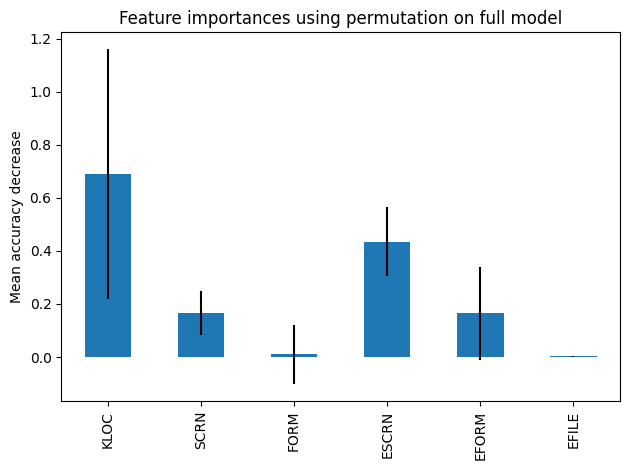

In [ ]:
# uso de permutation importance
permu = permutation_importance(modelo_svr, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
permu_importances = pd.Series(permu.importances_mean.round(3), index=feature_names)[permu.importances_mean.round(3) > 0.000]
fig, ax = plt.subplots()
permu_importances.plot.bar(yerr=permu.importances_std[permu.importances_mean.round(3) > 0.000], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

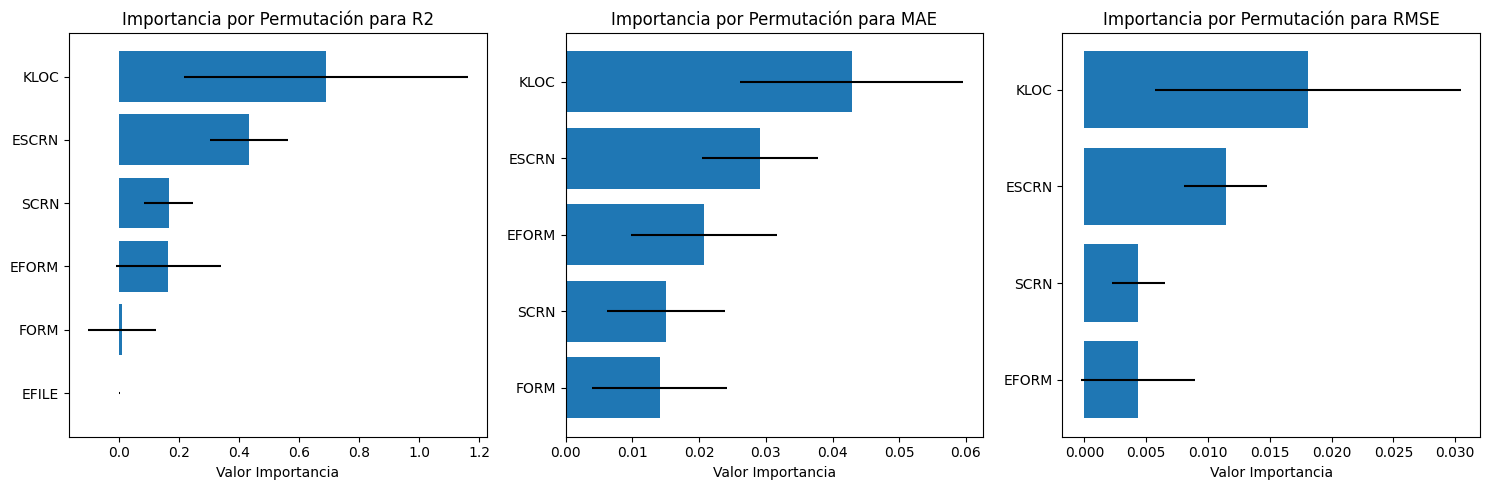

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
metric_names = ['R2', 'MAE', 'RMSE']

permu_score = permutation_importance(modelo_svr, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera a través de las métricas
for i, metric in enumerate(scoring):
    permu = permu_score[metric]

    # Filtra las características que cumplen la condición
    filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
    sorted_feature_names = [feature_names[j] for j in filtered_indices]
    importances_mean = permu.importances_mean[filtered_indices]
    importances_std = permu.importances_std[filtered_indices]

    # Ordena los datos por importancia de mayor a menor
    sorted_indices = np.argsort(importances_mean)[::1]
    sorted_feature_names = [sorted_feature_names[j] for j in sorted_indices]
    importances_mean = importances_mean[sorted_indices]
    importances_std = importances_std[sorted_indices]

    # Crea la representación gráfica en el subplot correspondiente
    axs[i].barh(range(len(sorted_feature_names)), importances_mean, xerr=importances_std, align='center')
    axs[i].set_yticks(range(len(sorted_feature_names)))
    axs[i].set_yticklabels(sorted_feature_names)
    axs[i].set_xlabel('Valor Importancia')
    axs[i].set_title(f'Importancia por Permutación para {metric_names[i]}')

# Ajusta los espacios entre subplots y muestra la figura
plt.tight_layout()
plt.show()

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Crea un diccionario para almacenar los DataFrames
results_global_svr = {}

permu_score = permutation_importance(modelo_svr, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
for i, metric in enumerate(scoring):
  permu = permu_score[metric]

  # Filtra las características que cumplen la condición
  filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
  sorted_feature_names = [feature_names[j] for j in filtered_indices]
  importances_mean = permu.importances_mean[filtered_indices]
  importances_std = permu.importances_std[filtered_indices]



  # Crear un DataFrame con los resultados
  df_exp_global = pd.DataFrame({'Feature': sorted_feature_names,
                       'Importance_Mean': importances_mean,
                       'Importance_Std': importances_std})

  # Ordenar el DataFrame por importance_mean en orden descendente
  df_exp_global = df_exp_global.sort_values(by='Importance_Mean', ascending=False)

  # Asignar el DataFrame al diccionario con el nombre de la métrica
  results_global_svr[f'df_global_{metric_names[i]}'] = df_exp_global

In [ ]:
results_global_svr['df_global_R2']

,Feature,Importance_Mean,Importance_Std
0,KLOC,0.689217,0.471218
3,ESCRN,0.434782,0.129238
1,SCRN,0.166021,0.081880
4,EFORM,0.164969,0.174269
2,FORM,0.010463,0.112381
5,EFILE,0.002707,0.001256


In [ ]:
results_global_svr['df_global_MAE']

,Feature,Importance_Mean,Importance_Std
0,KLOC,0.042850,0.016759
3,ESCRN,0.029078,0.008690
4,EFORM,0.020698,0.010971
1,SCRN,0.015040,0.008863
2,FORM,0.014104,0.010142


In [ ]:
results_global_svr['df_global_RMSE']

,Feature,Importance_Mean,Importance_Std
0,KLOC,0.018095,0.012372
2,ESCRN,0.011415,0.003393
1,SCRN,0.004359,0.002150
3,EFORM,0.004331,0.004575


**BREAK-DOWN, SHAP Y LIME:**

In [ ]:
#primero definimos el explainer
exp = dx.Explainer(modelo_svr, x_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 33 rows 6 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 33 values
  -> model_class       : sklearn.svm._classes.SVR (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7948f633fc70> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.264, mean = -0.0823, max = 0.796
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.207, mean = 0.159, max = 5.82
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [ ]:
# Primero obtenemos las instancias con valor estimado máximo, minimo y en la mediana.
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)
mediana = np.median(y_pred)

# Encontrar el índice de la instancia cuyo valor estimado está en la mediana
median_index = np.argmin(np.abs(y_pred - mediana))

print("Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es: ", max_index)
print("El valor máximo obtenido es: ", y_pred[max_index])
print("Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es: ", min_index)
print("El valor mínimo obtenido es: ", y_pred[min_index])
print("Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana: ", median_index)
print("El valor de la mediana es: ", y_pred[median_index])

Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es:  2
El valor máximo obtenido es:  0.3161707898009597
Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es:  12
El valor mínimo obtenido es:  -0.2659762562718662
Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana:  8
El valor de la mediana es:  -0.17739403371659768


In [ ]:
df_instancia_max = x_test.iloc[max_index]
df_instancia_median = x_test.iloc[median_index]
df_instancia_min = x_test.iloc[min_index]

In [ ]:
breakdown_max = exp.predict_parts(df_instancia_max, type="break_down",random_state=42)
breakdown_median = exp.predict_parts(df_instancia_median, type="break_down",random_state=42)
breakdown_min = exp.predict_parts(df_instancia_min, type="break_down",random_state=42)

shap_max = exp.predict_parts(df_instancia_max, type="shap",random_state=42)
shap_median = exp.predict_parts(df_instancia_median, type="shap",random_state=42)
shap_min = exp.predict_parts(df_instancia_min, type="shap",random_state=42)

lime_max = exp.predict_surrogate(df_instancia_max, random_state=42)
lime_median = exp.predict_surrogate(df_instancia_median, random_state=42)
lime_min = exp.predict_surrogate(df_instancia_min, random_state=42)

breakdown_df_max = breakdown_max.result
shap_df_max = shap_max.result
lime_df_max=lime_max.result
breakdown_df_median = breakdown_median.result
shap_df_median = shap_median.result
lime_df_median= lime_median.result
breakdown_df_min = breakdown_min.result
shap_df_min = shap_min.result
lime_df_min = lime_min.result

In [ ]:
breakdown_max.plot()
breakdown_median.plot()
breakdown_min.plot()

In [ ]:
shap_max.plot()
shap_median.plot()
shap_min.plot()

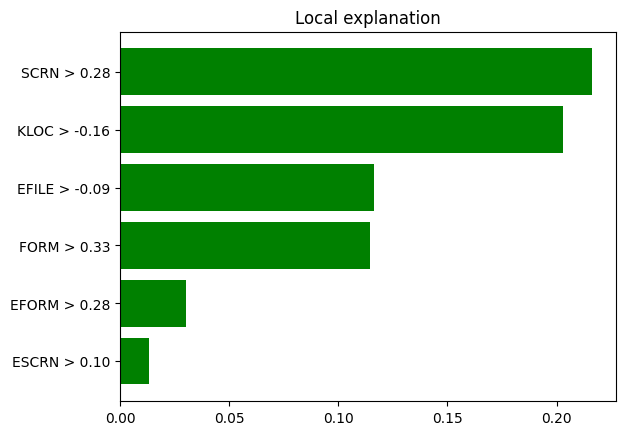

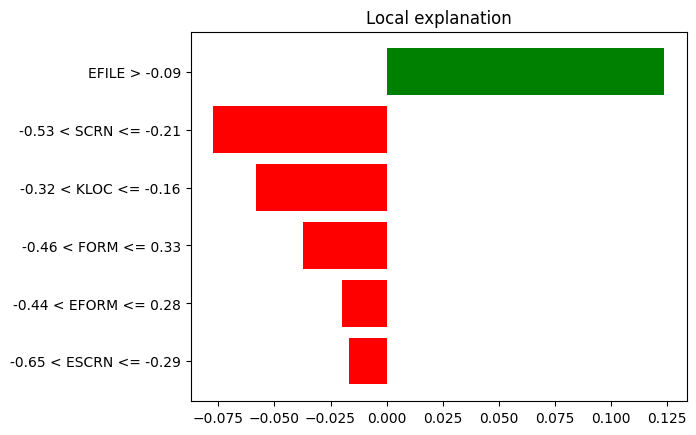

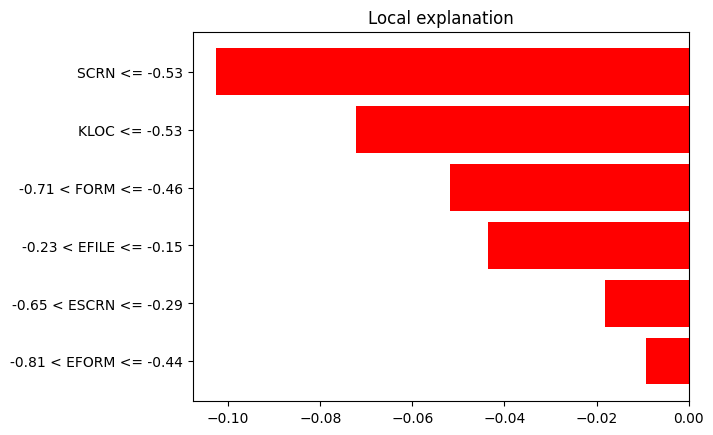

In [ ]:
lime_max.plot()
lime_median.plot()
lime_min.plot()

In [ ]:
lime_max.show_in_notebook()
lime_median.show_in_notebook()
lime_min.show_in_notebook()

### MAX:

In [ ]:
breakdown_df_max = breakdown_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_max = breakdown_df_max.drop(index=[0, 7])
breakdown_df_max['sign'] = breakdown_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_max = breakdown_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_max = shap_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_max = shap_df_max.tail(6)
shap_df_max['sign'] = shap_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_max = shap_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_max["Variable"] = lime_df_max["variable"].str.split(" ").str[0]
lime_df_max["Signo"] = lime_df_max["effect"].apply(evaluar_valor)
lime_df_max = lime_df_max.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_max = lime_df_max.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_max['Ranking'] = breakdown_df_max['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_max = breakdown_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_max['Ranking'] = shap_df_max['contribution'].abs().rank(ascending=False).astype(int)
shap_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_max = shap_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_max['Ranking'] = lime_df_max['effect'].abs().rank(ascending=False).astype(int)
lime_df_max = lime_df_max.head(5)
lime_df_max = lime_df_max[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_max = breakdown_df_max.drop(columns=['contribution'])
shap_df_max = shap_df_max.drop(columns=['contribution'])
lime_df_max = lime_df_max.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_max = breakdown_df_max.head(5)
breakdown_df_max = breakdown_df_max.reset_index(drop=True)

shap_df_max = shap_df_max.head(5)
shap_df_max = shap_df_max.reset_index(drop=True)

lime_df_max = lime_df_max.reset_index(drop=True)

print(breakdown_df_max)
print(shap_df_max)
print(lime_df_max)

  Variable  Ranking     Signo
0     KLOC        1  Positivo
1    ESCRN        2  Negativo
2    EFORM        3  Positivo
3     FORM        4  Positivo
4     SCRN        5  Positivo
  Variable  Ranking     Signo
0     KLOC        1  Positivo
1    EFORM        2  Positivo
2    ESCRN        3  Negativo
3     FORM        4  Positivo
4     SCRN        5  Positivo
  Variable  Ranking     Signo
0     SCRN        1  Positivo
1     KLOC        2  Positivo
2    EFILE        3  Positivo
3     FORM        4  Positivo
4    EFORM        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_max['Variable'])
shapley_features = list(shap_df_max['Variable'])
lime_features = list(lime_df_max['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_max = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_max['Variable'] = list(all_features)
df_final_max= df_final_max[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_max['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_max[breakdown_df_max['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_max[shap_df_max['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_max[lime_df_max['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_max

['KLOC', 'ESCRN', 'EFORM', 'FORM', 'SCRN']
['KLOC', 'EFORM', 'ESCRN', 'FORM', 'SCRN']
['SCRN', 'KLOC', 'EFILE', 'FORM', 'EFORM']
['ESCRN', 'EFORM', 'KLOC', 'SCRN', 'FORM', 'EFILE']


Variable Breakdown           Shapley              Lime          
             Ranking     Signo Ranking     Signo Ranking     Signo
0    ESCRN         2  Negativo       3  Negativo       -         -
1    EFORM         3  Positivo       2  Positivo       5  Positivo
2     KLOC         1  Positivo       1  Positivo       2  Positivo
3     SCRN         5  Positivo       5  Positivo       1  Positivo
4     FORM         4  Positivo       4  Positivo       4  Positivo
5    EFILE         -         -       -         -       3  Positivo

In [ ]:
df_final_max.set_index('Variable', inplace=True)
nuevo_orden = ["KLOC", "ESCRN", "EFORM", "FORM", "SCRN", "EFILE"]

# Reorganizar el DataFrame según el nuevo orden
df_final_max = df_final_max.reindex(nuevo_orden)

df_final_max

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
KLOC             1  Positivo       1  Positivo       2  Positivo
ESCRN            2  Negativo       3  Negativo       -         -
EFORM            3  Positivo       2  Positivo       5  Positivo
FORM             4  Positivo       4  Positivo       4  Positivo
SCRN             5  Positivo       5  Positivo       1  Positivo
EFILE            -         -       -         -       3  Positivo

### MEDIAN:

In [ ]:
breakdown_df_median = breakdown_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_median = breakdown_df_median.drop(index=[0, 7])
breakdown_df_median['sign'] = breakdown_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_median = breakdown_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_median = shap_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_median = shap_df_median.tail(6)
shap_df_median['sign'] = shap_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_median = shap_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_median["Variable"] = lime_df_median["variable"].str.split(" ").str[0]
lime_df_median["Signo"] = lime_df_median["effect"].apply(evaluar_valor)
lime_df_median = lime_df_median.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_median = lime_df_median.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_median['Ranking'] = breakdown_df_median['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_median = breakdown_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_median['Ranking'] = shap_df_median['contribution'].abs().rank(ascending=False).astype(int)
shap_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_median = shap_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_median['Ranking'] = lime_df_median['effect'].abs().rank(ascending=False).astype(int)
lime_df_median = lime_df_median.head(5)
lime_df_median = lime_df_median[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_median = breakdown_df_median.drop(columns=['contribution'])
shap_df_median = shap_df_median.drop(columns=['contribution'])
lime_df_median = lime_df_median.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_median = breakdown_df_median.head(5)
breakdown_df_median = breakdown_df_median.reset_index(drop=True)

shap_df_median = shap_df_median.head(5)
shap_df_median = shap_df_median.reset_index(drop=True)

lime_df_median = lime_df_median.reset_index(drop=True)
lime_df_median.at[1, "Variable"]="SCRN"
lime_df_median.at[2, "Variable"]="KLOC"
lime_df_median.at[3, "Variable"]="FORM"
lime_df_median.at[4, "Variable"]="EFORM"

print(breakdown_df_median)
print(shap_df_median)
print(lime_df_median)

  Variable  Ranking     Signo
0     KLOC        1  Negativo
1     SCRN        2  Negativo
2     FORM        3  Negativo
3    EFORM        4  Negativo
4    ESCRN        5  Negativo
  Variable  Ranking     Signo
0     SCRN        1  Negativo
1     KLOC        2  Negativo
2     FORM        3  Negativo
3    EFORM        4  Negativo
4    EFILE        5  Negativo
  Variable  Ranking     Signo
0    EFILE        1  Positivo
1     SCRN        2  Negativo
2     KLOC        3  Negativo
3     FORM        4  Negativo
4    EFORM        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_median['Variable'])
shapley_features = list(shap_df_median['Variable'])
lime_features = list(lime_df_median['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_median = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_median['Variable'] = list(all_features)
df_final_median= df_final_median[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_median['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_median[breakdown_df_median['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_median[shap_df_median['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_median[lime_df_median['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_median

['KLOC', 'SCRN', 'FORM', 'EFORM', 'ESCRN']
['SCRN', 'KLOC', 'FORM', 'EFORM', 'EFILE']
['EFILE', 'SCRN', 'KLOC', 'FORM', 'EFORM']
['ESCRN', 'EFORM', 'KLOC', 'SCRN', 'FORM', 'EFILE']


Variable Breakdown           Shapley              Lime          
             Ranking     Signo Ranking     Signo Ranking     Signo
0    ESCRN         5  Negativo       -         -       -         -
1    EFORM         4  Negativo       4  Negativo       5  Negativo
2     KLOC         1  Negativo       2  Negativo       3  Negativo
3     SCRN         2  Negativo       1  Negativo       2  Negativo
4     FORM         3  Negativo       3  Negativo       4  Negativo
5    EFILE         -         -       5  Negativo       1  Positivo

In [ ]:
df_final_median.set_index('Variable', inplace=True)
nuevo_orden = ["KLOC", "SCRN", "FORM", "EFORM", "ESCRN", "EFILE"]

# Reorganizar el DataFrame según el nuevo orden
df_final_median = df_final_median.reindex(nuevo_orden)

df_final_median

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
KLOC             1  Negativo       2  Negativo       3  Negativo
SCRN             2  Negativo       1  Negativo       2  Negativo
FORM             3  Negativo       3  Negativo       4  Negativo
EFORM            4  Negativo       4  Negativo       5  Negativo
ESCRN            5  Negativo       -         -       -         -
EFILE            -         -       5  Negativo       1  Positivo

### MIN:

In [ ]:
breakdown_df_min = breakdown_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_min = breakdown_df_min.drop(index=[0, 7])
breakdown_df_min['sign'] = breakdown_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_min = breakdown_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_min = shap_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_min = shap_df_min.tail(6)
shap_df_min['sign'] = shap_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_min = shap_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_min["Variable"] = lime_df_min["variable"].str.split(" ").str[0]
lime_df_min["Signo"] = lime_df_min["effect"].apply(evaluar_valor)
lime_df_min = lime_df_min.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_min = lime_df_min.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_min['Ranking'] = breakdown_df_min['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_min = breakdown_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_min['Ranking'] = shap_df_min['contribution'].abs().rank(ascending=False).astype(int)
shap_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_min = shap_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_min['Ranking'] = lime_df_min['effect'].abs().rank(ascending=False).astype(int)
lime_df_min = lime_df_min.head(5)
lime_df_min = lime_df_min[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_min = breakdown_df_min.drop(columns=['contribution'])
shap_df_min = shap_df_min.drop(columns=['contribution'])
lime_df_min = lime_df_min.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_min = breakdown_df_min.head(5)
breakdown_df_min = breakdown_df_min.reset_index(drop=True)

shap_df_min = shap_df_min.head(5)
shap_df_min = shap_df_min.reset_index(drop=True)

lime_df_min = lime_df_min.reset_index(drop=True)
lime_df_min.at[2, "Variable"]="FORM"
lime_df_min.at[3, "Variable"]="EFILE"
lime_df_min.at[4, "Variable"]="ESCRN"

print(breakdown_df_min)
print(shap_df_min)
print(lime_df_min)

  Variable  Ranking     Signo
0     KLOC        1  Negativo
1     SCRN        2  Negativo
2     FORM        3  Negativo
3    EFORM        4  Negativo
4    ESCRN        5  Negativo
  Variable  Ranking     Signo
0     SCRN        1  Negativo
1     KLOC        2  Negativo
2     FORM        3  Negativo
3    EFORM        4  Negativo
4    ESCRN        5  Negativo
  Variable  Ranking     Signo
0     SCRN        1  Negativo
1     KLOC        2  Negativo
2     FORM        3  Negativo
3    EFILE        4  Negativo
4    ESCRN        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_min['Variable'])
shapley_features = list(shap_df_min['Variable'])
lime_features = list(lime_df_min['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_min = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_min['Variable'] = list(all_features)
df_final_min= df_final_min[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_min['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_min[breakdown_df_min['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_min[shap_df_min['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_min[lime_df_min['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_min

['KLOC', 'SCRN', 'FORM', 'EFORM', 'ESCRN']
['SCRN', 'KLOC', 'FORM', 'EFORM', 'ESCRN']
['SCRN', 'KLOC', 'FORM', 'EFILE', 'ESCRN']
['ESCRN', 'EFORM', 'KLOC', 'SCRN', 'FORM', 'EFILE']


Variable Breakdown           Shapley              Lime          
             Ranking     Signo Ranking     Signo Ranking     Signo
0    ESCRN         5  Negativo       5  Negativo       5  Negativo
1    EFORM         4  Negativo       4  Negativo       -         -
2     KLOC         1  Negativo       2  Negativo       2  Negativo
3     SCRN         2  Negativo       1  Negativo       1  Negativo
4     FORM         3  Negativo       3  Negativo       3  Negativo
5    EFILE         -         -       -         -       4  Negativo

In [ ]:
df_final_min.set_index('Variable', inplace=True)
nuevo_orden = ["KLOC", "SCRN", "FORM", "EFORM", "ESCRN", "EFILE"]

# Reorganizar el DataFrame según el nuevo orden
df_final_min = df_final_min.reindex(nuevo_orden)

df_final_min

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
KLOC             1  Negativo       2  Negativo       2  Negativo
SCRN             2  Negativo       1  Negativo       1  Negativo
FORM             3  Negativo       3  Negativo       3  Negativo
EFORM            4  Negativo       4  Negativo       -         -
ESCRN            5  Negativo       5  Negativo       5  Negativo
EFILE            -         -       -         -       4  Negativo

### GLOBAL

In [ ]:
ranking_valores = {
    'Breakdown': [],
    'Shapley': [],
    'Lime': []
}

# Recorre los DataFrames y almacena los pares de valores por técnica
for tecnica in ranking_valores:
    for caracteristica in df_final_max.index:
        ranking = df_final_max[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_median.index:
        ranking = df_final_median[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_min.index:
        ranking = df_final_min[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

# Calcula el ranking medio por técnica y característica
ranking_medio = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, ranking in ranking_values:
        if caracteristica not in ranking_medio[tecnica]:
            ranking_medio[tecnica][caracteristica] = [ranking]
        else:
            ranking_medio[tecnica][caracteristica].append(ranking)

for tecnica, ranking_values in ranking_medio.items():
    for caracteristica in ranking_values:
        ranking_medio[tecnica][caracteristica] = sum(ranking_values[caracteristica]) / len(ranking_values[caracteristica])


# Ahora el conteo de apariciones por característica y técnica
apariciones_count = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, _ in ranking_values:
        if caracteristica not in apariciones_count[tecnica]:
            apariciones_count[tecnica][caracteristica] = 1
        else:
            apariciones_count[tecnica][caracteristica] += 1

# Tengo los valores, los conteos de apariciones y los ranking medios por técnica en los respectivos diccionarios
print(ranking_valores)
print(apariciones_count)
print(ranking_medio)

{'Breakdown': [('KLOC', 1), ('ESCRN', 2), ('EFORM', 3), ('FORM', 4), ('SCRN', 5), ('KLOC', 1), ('SCRN', 2), ('FORM', 3), ('EFORM', 4), ('ESCRN', 5), ('KLOC', 1), ('SCRN', 2), ('FORM', 3), ('EFORM', 4), ('ESCRN', 5)], 'Shapley': [('KLOC', 1), ('ESCRN', 3), ('EFORM', 2), ('FORM', 4), ('SCRN', 5), ('KLOC', 2), ('SCRN', 1), ('FORM', 3), ('EFORM', 4), ('EFILE', 5), ('KLOC', 2), ('SCRN', 1), ('FORM', 3), ('EFORM', 4), ('ESCRN', 5)], 'Lime': [('KLOC', 2), ('EFORM', 5), ('FORM', 4), ('SCRN', 1), ('EFILE', 3), ('KLOC', 3), ('SCRN', 2), ('FORM', 4), ('EFORM', 5), ('EFILE', 1), ('KLOC', 2), ('SCRN', 1), ('FORM', 3), ('ESCRN', 5), ('EFILE', 4)]}
{'Breakdown': {'KLOC': 3, 'ESCRN': 3, 'EFORM': 3, 'FORM': 3, 'SCRN': 3}, 'Shapley': {'KLOC': 3, 'ESCRN': 2, 'EFORM': 3, 'FORM': 3, 'SCRN': 3, 'EFILE': 1}, 'Lime': {'KLOC': 3, 'EFORM': 2, 'FORM': 3, 'SCRN': 3, 'EFILE': 3, 'ESCRN': 1}}
{'Breakdown': {'KLOC': 1.0, 'ESCRN': 4.0, 'EFORM': 3.6666666666666665, 'FORM': 3.3333333333333335, 'SCRN': 3.0}, 'Shapley': 

In [ ]:
# Lista de técnicas
techniques = ['Breakdown', 'Shapley', 'Lime']

# Diccionario para almacenar los datos
data_dict = {}

# Crear una lista de todas las características
all_caract = list(set().union(*[set(ranking_medio[technique]) for technique in techniques]))

# Recorrer las técnicas y las características
for technique in techniques:
    caract = list(ranking_medio[technique].keys())
    rank = [ranking_medio[technique].get(c, "-") for c in all_caract]
    apar = [apariciones_count[technique].get(c, "-") for c in all_caract]

    # Agregar los datos al diccionario
    data_dict[(technique, "Ranking Medio")] = rank
    data_dict[(technique, "Conteo")] = apar

# Crear el DataFrame resumen
df_resumen_svr = pd.DataFrame(data_dict, index=all_caract)

df_resumen_svr

Breakdown              Shapley                 Lime       
      Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo
EFILE             -      -      5.000000      1      2.666667      3
FORM       3.333333      3      3.333333      3      3.666667      3
SCRN            3.0      3      2.333333      3      1.333333      3
KLOC            1.0      3      1.666667      3      2.333333      3
EFORM      3.666667      3      3.333333      3      5.000000      2
ESCRN           4.0      3      4.000000      2      5.000000      1

In [ ]:
# Calcular el ranking medio general omitiendo los valores "-"
df_resumen_svr[("General", "Ranking")] = df_resumen_svr[[(tech, "Ranking Medio") for tech in techniques]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_svr[("General", "Conteo Total")] = df_resumen_svr[[(tech, "Conteo") for tech in techniques]].replace('-', 0).sum(axis=1)

# Mostrar el DataFrame resumen actualizado
df_resumen_svr

Breakdown              Shapley                 Lime         \
      Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
EFILE             -      -      5.000000      1      2.666667      3   
FORM       3.333333      3      3.333333      3      3.666667      3   
SCRN            3.0      3      2.333333      3      1.333333      3   
KLOC            1.0      3      1.666667      3      2.333333      3   
EFORM      3.666667      3      3.333333      3      5.000000      2   
ESCRN           4.0      3      4.000000      2      5.000000      1   

        General               
        Ranking Conteo Total  
EFILE  3.833333            4  
FORM   3.444444            9  
SCRN   2.222222            9  
KLOC   1.666667            9  
EFORM  4.000000            8  
ESCRN  4.333333            6

In [ ]:
# Obtener el número de características
num_caract = df_resumen_svr.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_svr[("General", "Peso Rango")] = 1 - ((df_resumen_svr[("General", "Ranking")].rank(ascending=True) - 1) / num_caract)
df_resumen_svr[("General", "Peso Conteo")] = df_resumen_svr[("General", "Conteo Total")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_svr[("General", "Puntaje")] = df_resumen_svr[("General", "Peso Rango")] + df_resumen_svr[("General", "Peso Conteo")]
df_resumen_svr[("General", "Ranking")] = df_resumen_svr[("General", "Puntaje")].rank(ascending=False, method="min")

# Eliminar la subcolumnas innecesarias
df_resumen_svr.drop("Peso Rango", axis=1, level=1, inplace=True)
df_resumen_svr.drop("Peso Conteo", axis=1, level=1, inplace=True)
df_resumen_svr.drop("Puntaje", axis=1, level=1, inplace=True)

df_resumen_svr

Breakdown              Shapley                 Lime        General  \
      Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo Ranking   
EFILE             -      -      5.000000      1      2.666667      3     5.0   
FORM       3.333333      3      3.333333      3      3.666667      3     3.0   
SCRN            3.0      3      2.333333      3      1.333333      3     2.0   
KLOC            1.0      3      1.666667      3      2.333333      3     1.0   
EFORM      3.666667      3      3.333333      3      5.000000      2     4.0   
ESCRN           4.0      3      4.000000      2      5.000000      1     6.0   

                    
      Conteo Total  
EFILE            4  
FORM             9  
SCRN             9  
KLOC             9  
EFORM            8  
ESCRN            6

In [ ]:
# Obtener las columnas actuales del DataFrame
columns = df_resumen_svr.columns

# Extraer las columnas de "General" y sus subcolumnas
general_columns = columns.get_level_values(0) == "General"

# Crear una lista con las subcolumnas de "General"
general_subcolumns = [("General", "Ranking"), ("General", "Conteo Total")]

# Crear una lista con las subcolumnas asociadas a las técnicas
technique_subcolumns = list(columns[~general_columns])

# Reorganizar las columnas para mover "General" al principio
new_columns = general_subcolumns + technique_subcolumns

# Crear un nuevo DataFrame con las columnas reorganizadas
df_resumen_svr = df_resumen_svr[new_columns]

In [ ]:
df_resumen_svr.sort_values(by=("General", "Ranking"), ascending=True, inplace=True)

# Formatear los valores
for tech in techniques:
    df_resumen_svr[(tech, "Ranking Medio")] = df_resumen_svr[(tech, "Ranking Medio")].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

df_resumen_svr

General                  Breakdown              Shapley         \
      Ranking Conteo Total Ranking Medio Conteo Ranking Medio Conteo   
KLOC      1.0            9          1.00      3          1.67      3   
SCRN      2.0            9          3.00      3          2.33      3   
FORM      3.0            9          3.33      3          3.33      3   
EFORM     4.0            8          3.67      3          3.33      3   
EFILE     5.0            4             -      -          5.00      1   
ESCRN     6.0            6          4.00      3          4.00      2   

               Lime         
      Ranking Medio Conteo  
KLOC           2.33      3  
SCRN           1.33      3  
FORM           3.67      3  
EFORM          5.00      2  
EFILE          2.67      3  
ESCRN          5.00      1

## **RandomForest:**

**FEATURE IMPORTANCE:**

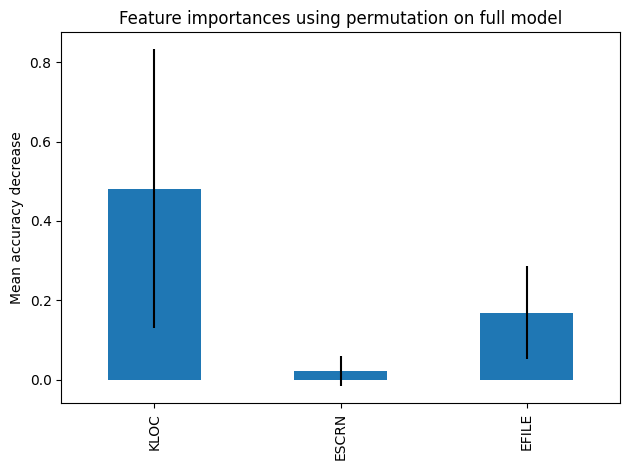

In [ ]:
#uso de permutation importance
permu = permutation_importance(modelo_rf, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
permu_importances = pd.Series(permu.importances_mean.round(3), index=feature_names)[permu.importances_mean.round(3) > 0.000]
fig, ax = plt.subplots()
permu_importances.plot.bar(yerr=permu.importances_std[permu.importances_mean.round(3) > 0.000], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

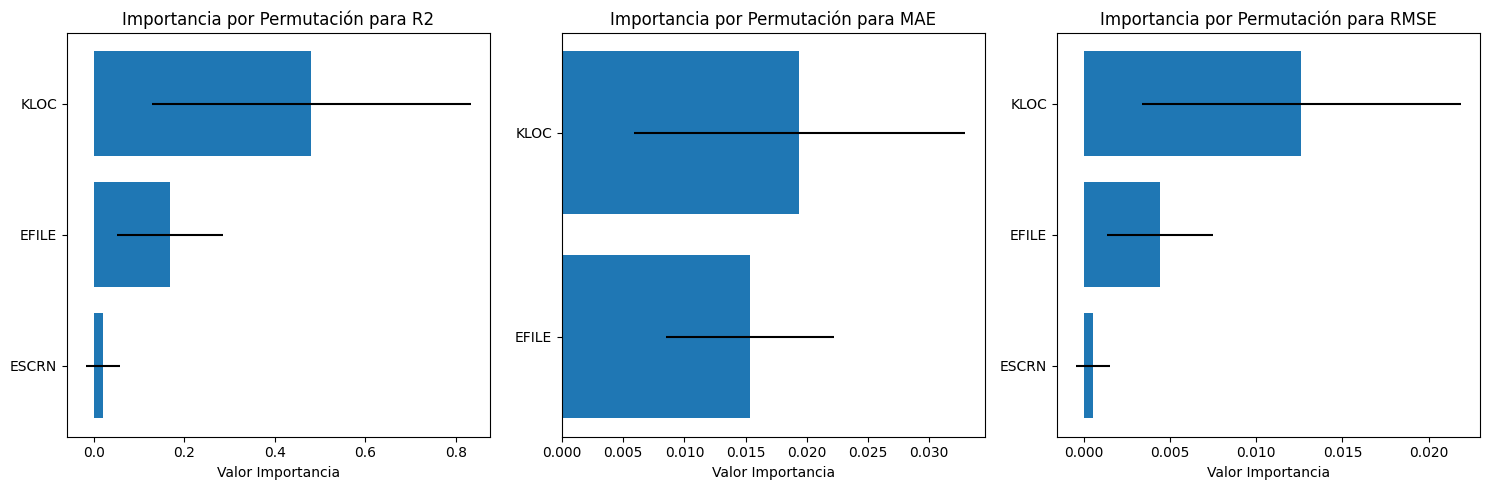

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
metric_names = ['R2', 'MAE', 'RMSE']

permu_score = permutation_importance(modelo_rf, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera a través de las métricas
for i, metric in enumerate(scoring):
    permu = permu_score[metric]

    # Filtra las características que cumplen la condición
    filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
    sorted_feature_names = [feature_names[j] for j in filtered_indices]
    importances_mean = permu.importances_mean[filtered_indices]
    importances_std = permu.importances_std[filtered_indices]

    # Ordena los datos por importancia de mayor a menor
    sorted_indices = np.argsort(importances_mean)[::1]
    sorted_feature_names = [sorted_feature_names[j] for j in sorted_indices]
    importances_mean = importances_mean[sorted_indices]
    importances_std = importances_std[sorted_indices]

    # Crea la representación gráfica en el subplot correspondiente
    axs[i].barh(range(len(sorted_feature_names)), importances_mean, xerr=importances_std, align='center')
    axs[i].set_yticks(range(len(sorted_feature_names)))
    axs[i].set_yticklabels(sorted_feature_names)
    axs[i].set_xlabel('Valor Importancia')
    axs[i].set_title(f'Importancia por Permutación para {metric_names[i]}')

# Ajusta los espacios entre subplots y muestra la figura
plt.tight_layout()
plt.show()

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Crea un diccionario para almacenar los DataFrames
results_global_rf = {}

permu_score = permutation_importance(modelo_rf, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
for i, metric in enumerate(scoring):
  permu = permu_score[metric]

  # Filtra las características que cumplen la condición
  filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
  sorted_feature_names = [feature_names[j] for j in filtered_indices]
  importances_mean = permu.importances_mean[filtered_indices]
  importances_std = permu.importances_std[filtered_indices]



  # Crear un DataFrame con los resultados
  df_exp_global = pd.DataFrame({'Feature': sorted_feature_names,
                       'Importance_Mean': importances_mean,
                       'Importance_Std': importances_std})

  # Ordenar el DataFrame por importance_mean en orden descendente
  df_exp_global = df_exp_global.sort_values(by='Importance_Mean', ascending=False)

  # Asignar el DataFrame al diccionario con el nombre de la métrica
  results_global_rf[f'df_global_{metric_names[i]}'] = df_exp_global

In [ ]:
results_global_rf['df_global_R2']

,Feature,Importance_Mean,Importance_Std
0,KLOC,0.480636,0.351926
2,EFILE,0.169013,0.117016
1,ESCRN,0.020769,0.037560


In [ ]:
results_global_rf['df_global_MAE']

,Feature,Importance_Mean,Importance_Std
0,KLOC,0.019384,0.013530
1,EFILE,0.015395,0.006863


In [ ]:
results_global_rf['df_global_RMSE']

,Feature,Importance_Mean,Importance_Std
0,KLOC,0.012619,0.009240
2,EFILE,0.004437,0.003072
1,ESCRN,0.000545,0.000986


**BREAK-DOWN, SHAP Y LIME:**

In [ ]:
#primero definimos el explainer
exp = dx.Explainer(modelo_rf, x_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 33 rows 6 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 33 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7948f633fc70> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.295, mean = 0.0239, max = 4.72
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.273, mean = 0.0527, max = 1.9
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Primero obtenemos las instancias con valor estimado máximo, minimo y en la mediana.
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)
mediana = np.median(y_pred)
#Encontrar el índice de la instancia cuyo valor estimado está en la mediana
median_index = np.argmin(np.abs(y_pred - mediana))

print("Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es: ", max_index)
print("El valor máximo obtenido es: ", y_pred[max_index])
print("Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es: ", min_index)
print("El valor mínimo obtenido es: ", y_pred[min_index])
print("Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana: ", median_index)
print("El valor de la mediana es: ", y_pred[median_index])

Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es:  2
El valor máximo obtenido es:  0.5890063863390298
Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es:  12
El valor mínimo obtenido es:  -0.29195662782859244
Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana:  6
El valor de la mediana es:  -0.19173420008800246


In [ ]:
df_instancia_max = x_test.iloc[max_index]
df_instancia_median = x_test.iloc[median_index]
df_instancia_min = x_test.iloc[min_index]

In [ ]:
breakdown_max = exp.predict_parts(df_instancia_max, type="break_down",random_state=42)
breakdown_median = exp.predict_parts(df_instancia_median, type="break_down",random_state=42)
breakdown_min = exp.predict_parts(df_instancia_min, type="break_down",random_state=42)

shap_max = exp.predict_parts(df_instancia_max, type="shap",random_state=42)
shap_median = exp.predict_parts(df_instancia_median, type="shap",random_state=42)
shap_min = exp.predict_parts(df_instancia_min, type="shap",random_state=42)

lime_max = exp.predict_surrogate(df_instancia_max, random_state=42)
lime_median = exp.predict_surrogate(df_instancia_median, random_state=42)
lime_min = exp.predict_surrogate(df_instancia_min, random_state=42)

breakdown_df_max = breakdown_max.result
shap_df_max = shap_max.result
lime_df_max=lime_max.result
breakdown_df_median = breakdown_median.result
shap_df_median = shap_median.result
lime_df_median= lime_median.result
breakdown_df_min = breakdown_min.result
shap_df_min = shap_min.result
lime_df_min = lime_min.result

In [ ]:
breakdown_max.plot()
breakdown_median.plot()
breakdown_min.plot()

In [ ]:
shap_max.plot()
shap_median.plot()
shap_min.plot()

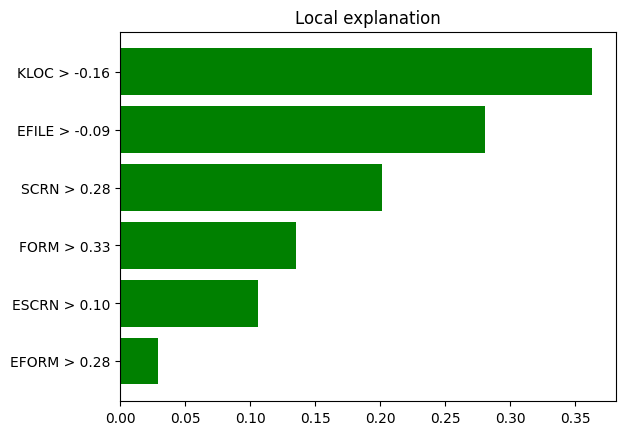

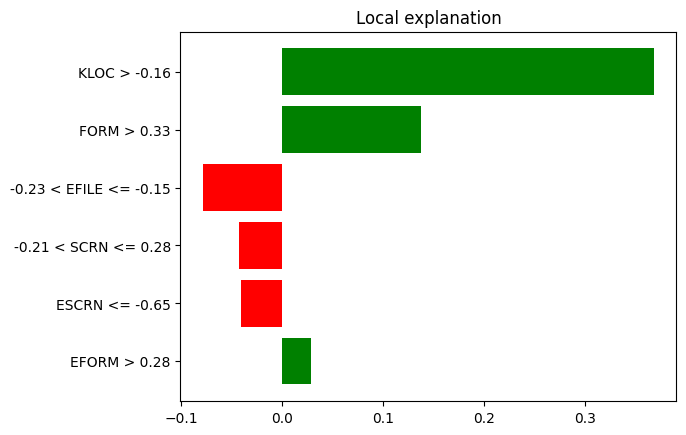

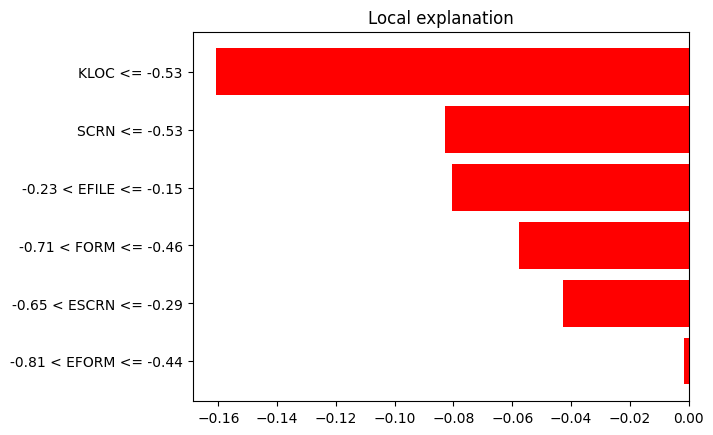

In [ ]:
lime_max.plot()
lime_median.plot()
lime_min.plot()

In [ ]:
lime_max.show_in_notebook()
lime_median.show_in_notebook()
lime_min.show_in_notebook()

### MAX:

In [ ]:
breakdown_df_max = breakdown_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_max = breakdown_df_max.drop(index=[0, 7])
breakdown_df_max['sign'] = breakdown_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_max = breakdown_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_max = shap_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_max = shap_df_max.tail(6)
shap_df_max['sign'] = shap_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_max = shap_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_max["Variable"] = lime_df_max["variable"].str.split(" ").str[0]
lime_df_max["Signo"] = lime_df_max["effect"].apply(evaluar_valor)
lime_df_max = lime_df_max.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_max = lime_df_max.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_max['Ranking'] = breakdown_df_max['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_max = breakdown_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_max['Ranking'] = shap_df_max['contribution'].abs().rank(ascending=False).astype(int)
shap_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_max = shap_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_max['Ranking'] = lime_df_max['effect'].abs().rank(ascending=False).astype(int)
lime_df_max = lime_df_max.head(5)
lime_df_max = lime_df_max[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_max = breakdown_df_max.drop(columns=['contribution'])
shap_df_max = shap_df_max.drop(columns=['contribution'])
lime_df_max = lime_df_max.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_max = breakdown_df_max.head(5)
breakdown_df_max = breakdown_df_max.reset_index(drop=True)

shap_df_max = shap_df_max.head(5)
shap_df_max = shap_df_max.reset_index(drop=True)

lime_df_max = lime_df_max.reset_index(drop=True)

print(breakdown_df_max)
print(shap_df_max)
print(lime_df_max)

  Variable  Ranking     Signo
0     KLOC        1  Positivo
1    EFORM        2  Positivo
2     SCRN        3  Positivo
3    ESCRN        4  Negativo
4    EFILE        5  Positivo
  Variable  Ranking     Signo
0     KLOC        1  Positivo
1     SCRN        2  Positivo
2    EFORM        3  Positivo
3    ESCRN        4  Negativo
4    EFILE        5  Positivo
  Variable  Ranking     Signo
0     KLOC        1  Positivo
1    EFILE        2  Positivo
2     SCRN        3  Positivo
3     FORM        4  Positivo
4    ESCRN        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_max['Variable'])
shapley_features = list(shap_df_max['Variable'])
lime_features = list(lime_df_max['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_max = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_max['Variable'] = list(all_features)
df_final_max= df_final_max[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_max['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_max[breakdown_df_max['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_max[shap_df_max['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_max[lime_df_max['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_max

['KLOC', 'EFORM', 'SCRN', 'ESCRN', 'EFILE']
['KLOC', 'SCRN', 'EFORM', 'ESCRN', 'EFILE']
['KLOC', 'EFILE', 'SCRN', 'FORM', 'ESCRN']
['ESCRN', 'EFORM', 'KLOC', 'SCRN', 'FORM', 'EFILE']


Variable Breakdown           Shapley              Lime          
             Ranking     Signo Ranking     Signo Ranking     Signo
0    ESCRN         4  Negativo       4  Negativo       5  Positivo
1    EFORM         2  Positivo       3  Positivo       -         -
2     KLOC         1  Positivo       1  Positivo       1  Positivo
3     SCRN         3  Positivo       2  Positivo       3  Positivo
4     FORM         -         -       -         -       4  Positivo
5    EFILE         5  Positivo       5  Positivo       2  Positivo

In [ ]:
df_final_max.set_index('Variable', inplace=True)
nuevo_orden = ["KLOC", "EFORM", "SCRN", "ESCRN", "EFILE", "FORM"]

# Reorganizar el DataFrame según el nuevo orden
df_final_max = df_final_max.reindex(nuevo_orden)

df_final_max

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
KLOC             1  Positivo       1  Positivo       1  Positivo
EFORM            2  Positivo       3  Positivo       -         -
SCRN             3  Positivo       2  Positivo       3  Positivo
ESCRN            4  Negativo       4  Negativo       5  Positivo
EFILE            5  Positivo       5  Positivo       2  Positivo
FORM             -         -       -         -       4  Positivo

### MEDIAN:

In [ ]:
breakdown_df_median = breakdown_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_median = breakdown_df_median.drop(index=[0, 7])
breakdown_df_median['sign'] = breakdown_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_median = breakdown_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_median = shap_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_median = shap_df_median.tail(6)
shap_df_median['sign'] = shap_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_median = shap_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_median["Variable"] = lime_df_median["variable"].str.split(" ").str[0]
lime_df_median["Signo"] = lime_df_median["effect"].apply(evaluar_valor)
lime_df_median = lime_df_median.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_median = lime_df_median.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_median['Ranking'] = breakdown_df_median['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_median = breakdown_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_median['Ranking'] = shap_df_median['contribution'].abs().rank(ascending=False).astype(int)
shap_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_median = shap_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_median['Ranking'] = lime_df_median['effect'].abs().rank(ascending=False).astype(int)
lime_df_median = lime_df_median.head(5)
lime_df_median = lime_df_median[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_median = breakdown_df_median.drop(columns=['contribution'])
shap_df_median = shap_df_median.drop(columns=['contribution'])
lime_df_median = lime_df_median.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_median = breakdown_df_median.head(5)
breakdown_df_median = breakdown_df_median.reset_index(drop=True)

shap_df_median = shap_df_median.head(5)
shap_df_median = shap_df_median.reset_index(drop=True)

lime_df_median = lime_df_median.reset_index(drop=True)
lime_df_median.at[2, "Variable"]="EFILE"
lime_df_median.at[3, "Variable"]="SCRN"

print(breakdown_df_median)
print(shap_df_median)
print(lime_df_median)

  Variable  Ranking     Signo
0     KLOC        1  Negativo
1     FORM        2  Negativo
2    EFILE        3  Negativo
3    ESCRN        4  Negativo
4     SCRN        5  Negativo
  Variable  Ranking     Signo
0     KLOC        1  Negativo
1     FORM        2  Negativo
2    EFILE        3  Negativo
3     SCRN        4  Negativo
4    ESCRN        5  Negativo
  Variable  Ranking     Signo
0     KLOC        1  Positivo
1     FORM        2  Positivo
2    EFILE        3  Negativo
3     SCRN        4  Negativo
4    ESCRN        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_median['Variable'])
shapley_features = list(shap_df_median['Variable'])
lime_features = list(lime_df_median['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_median = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_median['Variable'] = list(all_features)
df_final_median= df_final_median[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_median['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_median[breakdown_df_median['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_median[shap_df_median['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_median[lime_df_median['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_median

['KLOC', 'FORM', 'EFILE', 'ESCRN', 'SCRN']
['KLOC', 'FORM', 'EFILE', 'SCRN', 'ESCRN']
['KLOC', 'FORM', 'EFILE', 'SCRN', 'ESCRN']
['ESCRN', 'KLOC', 'SCRN', 'FORM', 'EFILE']


Variable Breakdown           Shapley              Lime          
             Ranking     Signo Ranking     Signo Ranking     Signo
0    ESCRN         4  Negativo       5  Negativo       5  Negativo
1     KLOC         1  Negativo       1  Negativo       1  Positivo
2     SCRN         5  Negativo       4  Negativo       4  Negativo
3     FORM         2  Negativo       2  Negativo       2  Positivo
4    EFILE         3  Negativo       3  Negativo       3  Negativo

In [ ]:
df_final_median.set_index('Variable', inplace=True)

nuevo_orden = ["KLOC","FORM", "EFILE", "ESCRN", "SCRN"]

# Reorganizar el DataFrame según el nuevo orden
df_final_median = df_final_median.reindex(nuevo_orden)

df_final_median

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
KLOC             1  Negativo       1  Negativo       1  Positivo
FORM             2  Negativo       2  Negativo       2  Positivo
EFILE            3  Negativo       3  Negativo       3  Negativo
ESCRN            4  Negativo       5  Negativo       5  Negativo
SCRN             5  Negativo       4  Negativo       4  Negativo

### MIN:

In [ ]:
breakdown_df_min = breakdown_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_min = breakdown_df_min.drop(index=[0, 7])
breakdown_df_min['sign'] = breakdown_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_min = breakdown_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_min = shap_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_min = shap_df_min.tail(6)
shap_df_min['sign'] = shap_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_min = shap_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_min["Variable"] = lime_df_min["variable"].str.split(" ").str[0]
lime_df_min["Signo"] = lime_df_min["effect"].apply(evaluar_valor)
lime_df_min = lime_df_min.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_min = lime_df_min.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_min['Ranking'] = breakdown_df_min['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_min = breakdown_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_min['Ranking'] = shap_df_min['contribution'].abs().rank(ascending=False).astype(int)
shap_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_min = shap_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_min['Ranking'] = lime_df_min['effect'].abs().rank(ascending=False).astype(int)
lime_df_min = lime_df_min.head(5)
lime_df_min = lime_df_min[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_min = breakdown_df_min.drop(columns=['contribution'])
shap_df_min = shap_df_min.drop(columns=['contribution'])
lime_df_min = lime_df_min.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_min = breakdown_df_min.head(5)
breakdown_df_min = breakdown_df_min.reset_index(drop=True)

shap_df_min = shap_df_min.head(5)
shap_df_min = shap_df_min.reset_index(drop=True)

lime_df_min = lime_df_min.reset_index(drop=True)
lime_df_min.at[2, "Variable"]="EFILE"
lime_df_min.at[3, "Variable"]="FORM"
lime_df_min.at[4, "Variable"]="ESCRN"

print(breakdown_df_min)
print(shap_df_min)
print(lime_df_min)

  Variable  Ranking     Signo
0     KLOC        1  Negativo
1     FORM        2  Negativo
2    EFILE        3  Negativo
3     SCRN        4  Negativo
4    ESCRN        5  Negativo
  Variable  Ranking     Signo
0     KLOC        1  Negativo
1     FORM        2  Negativo
2    EFILE        3  Negativo
3     SCRN        4  Negativo
4    ESCRN        5  Negativo
  Variable  Ranking     Signo
0     KLOC        1  Negativo
1     SCRN        2  Negativo
2    EFILE        3  Negativo
3     FORM        4  Negativo
4    ESCRN        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_min['Variable'])
shapley_features = list(shap_df_min['Variable'])
lime_features = list(lime_df_min['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_min = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_min['Variable'] = list(all_features)
df_final_min= df_final_min[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_min['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_min[breakdown_df_min['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_min[shap_df_min['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_min[lime_df_min['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_min

['KLOC', 'FORM', 'EFILE', 'SCRN', 'ESCRN']
['KLOC', 'FORM', 'EFILE', 'SCRN', 'ESCRN']
['KLOC', 'SCRN', 'EFILE', 'FORM', 'ESCRN']
['ESCRN', 'KLOC', 'SCRN', 'FORM', 'EFILE']


Variable Breakdown           Shapley              Lime          
             Ranking     Signo Ranking     Signo Ranking     Signo
0    ESCRN         5  Negativo       5  Negativo       5  Negativo
1     KLOC         1  Negativo       1  Negativo       1  Negativo
2     SCRN         4  Negativo       4  Negativo       2  Negativo
3     FORM         2  Negativo       2  Negativo       4  Negativo
4    EFILE         3  Negativo       3  Negativo       3  Negativo

In [ ]:
df_final_min.set_index('Variable', inplace=True)
nuevo_orden = ["KLOC", "FORM", "EFILE", "SCRN", "ESCRN"]

# Reorganizar el DataFrame según el nuevo orden
df_final_min = df_final_min.reindex(nuevo_orden)

df_final_min

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
KLOC             1  Negativo       1  Negativo       1  Negativo
FORM             2  Negativo       2  Negativo       4  Negativo
EFILE            3  Negativo       3  Negativo       3  Negativo
SCRN             4  Negativo       4  Negativo       2  Negativo
ESCRN            5  Negativo       5  Negativo       5  Negativo

### GLOBAL

In [ ]:
ranking_valores = {
    'Breakdown': [],
    'Shapley': [],
    'Lime': []
}

# Recorre los DataFrames y almacena los pares de valores por técnica
for tecnica in ranking_valores:
    for caracteristica in df_final_max.index:
        ranking = df_final_max[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_median.index:
        ranking = df_final_median[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_min.index:
        ranking = df_final_min[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

# Calcula el ranking medio por técnica y característica
ranking_medio = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, ranking in ranking_values:
        if caracteristica not in ranking_medio[tecnica]:
            ranking_medio[tecnica][caracteristica] = [ranking]
        else:
            ranking_medio[tecnica][caracteristica].append(ranking)

for tecnica, ranking_values in ranking_medio.items():
    for caracteristica in ranking_values:
        ranking_medio[tecnica][caracteristica] = sum(ranking_values[caracteristica]) / len(ranking_values[caracteristica])


# Ahora el conteo de apariciones por característica y técnica
apariciones_count = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, _ in ranking_values:
        if caracteristica not in apariciones_count[tecnica]:
            apariciones_count[tecnica][caracteristica] = 1
        else:
            apariciones_count[tecnica][caracteristica] += 1

# Tengo los valores, los conteos de apariciones y los ranking medios por técnica en los respectivos diccionarios
print(ranking_valores)
print(apariciones_count)
print(ranking_medio)

{'Breakdown': [('KLOC', 1), ('EFORM', 2), ('SCRN', 3), ('ESCRN', 4), ('EFILE', 5), ('KLOC', 1), ('FORM', 2), ('EFILE', 3), ('ESCRN', 4), ('SCRN', 5), ('KLOC', 1), ('FORM', 2), ('EFILE', 3), ('SCRN', 4), ('ESCRN', 5)], 'Shapley': [('KLOC', 1), ('EFORM', 3), ('SCRN', 2), ('ESCRN', 4), ('EFILE', 5), ('KLOC', 1), ('FORM', 2), ('EFILE', 3), ('ESCRN', 5), ('SCRN', 4), ('KLOC', 1), ('FORM', 2), ('EFILE', 3), ('SCRN', 4), ('ESCRN', 5)], 'Lime': [('KLOC', 1), ('SCRN', 3), ('ESCRN', 5), ('EFILE', 2), ('FORM', 4), ('KLOC', 1), ('FORM', 2), ('EFILE', 3), ('ESCRN', 5), ('SCRN', 4), ('KLOC', 1), ('FORM', 4), ('EFILE', 3), ('SCRN', 2), ('ESCRN', 5)]}
{'Breakdown': {'KLOC': 3, 'EFORM': 1, 'SCRN': 3, 'ESCRN': 3, 'EFILE': 3, 'FORM': 2}, 'Shapley': {'KLOC': 3, 'EFORM': 1, 'SCRN': 3, 'ESCRN': 3, 'EFILE': 3, 'FORM': 2}, 'Lime': {'KLOC': 3, 'SCRN': 3, 'ESCRN': 3, 'EFILE': 3, 'FORM': 3}}
{'Breakdown': {'KLOC': 1.0, 'EFORM': 2.0, 'SCRN': 4.0, 'ESCRN': 4.333333333333333, 'EFILE': 3.6666666666666665, 'FORM': 2.

In [ ]:
# Lista de técnicas
techniques = ['Breakdown', 'Shapley', 'Lime']

# Diccionario para almacenar los datos
data_dict = {}

# Crear una lista de todas las características
all_caract = list(set().union(*[set(ranking_medio[technique]) for technique in techniques]))

# Recorrer las técnicas y las características
for technique in techniques:
    caract = list(ranking_medio[technique].keys())
    rank = [ranking_medio[technique].get(c, "-") for c in all_caract]
    apar = [apariciones_count[technique].get(c, "-") for c in all_caract]

    # Agregar los datos al diccionario
    data_dict[(technique, "Ranking Medio")] = rank
    data_dict[(technique, "Conteo")] = apar

# Crear el DataFrame resumen
df_resumen_rf = pd.DataFrame(data_dict, index=all_caract)

df_resumen_rf

Breakdown              Shapley                 Lime       
      Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo
EFILE      3.666667      3      3.666667      3      2.666667      3
FORM       2.000000      2      2.000000      2      3.333333      3
SCRN       4.000000      3      3.333333      3           3.0      3
KLOC       1.000000      3      1.000000      3           1.0      3
EFORM      2.000000      1      3.000000      1             -      -
ESCRN      4.333333      3      4.666667      3           5.0      3

In [ ]:
# Calcular el ranking medio general omitiendo los valores "-"
df_resumen_rf[("General", "Ranking")] = df_resumen_rf[[(tech, "Ranking Medio") for tech in techniques]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_rf[("General", "Conteo Total")] = df_resumen_rf[[(tech, "Conteo") for tech in techniques]].replace('-', 0).sum(axis=1)

# Mostrar el DataFrame resumen actualizado
df_resumen_rf

Breakdown              Shapley                 Lime         \
      Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
EFILE      3.666667      3      3.666667      3      2.666667      3   
FORM       2.000000      2      2.000000      2      3.333333      3   
SCRN       4.000000      3      3.333333      3           3.0      3   
KLOC       1.000000      3      1.000000      3           1.0      3   
EFORM      2.000000      1      3.000000      1             -      -   
ESCRN      4.333333      3      4.666667      3           5.0      3   

        General               
        Ranking Conteo Total  
EFILE  3.333333            9  
FORM   2.444444            7  
SCRN   3.444444            9  
KLOC   1.000000            9  
EFORM  2.500000            2  
ESCRN  4.666667            9

In [ ]:
# Obtener el número de características
num_caract = df_resumen_rf.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_rf[("General", "Peso Rango")] = 1 - ((df_resumen_rf[("General", "Ranking")].rank(ascending=True) - 1) / num_caract)
df_resumen_rf[("General", "Peso Conteo")] = df_resumen_rf[("General", "Conteo Total")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_rf[("General", "Puntaje")] = df_resumen_rf[("General", "Peso Rango")] + df_resumen_rf[("General", "Peso Conteo")]
df_resumen_rf[("General", "Ranking")] = df_resumen_rf[("General", "Puntaje")].rank(ascending=False, method="min")

# Eliminar la subcolumnas innecesarias
df_resumen_rf.drop("Peso Rango", axis=1, level=1, inplace=True)
df_resumen_rf.drop("Peso Conteo", axis=1, level=1, inplace=True)
df_resumen_rf.drop("Puntaje", axis=1, level=1, inplace=True)

df_resumen_rf

Breakdown              Shapley                 Lime        General  \
      Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo Ranking   
EFILE      3.666667      3      3.666667      3      2.666667      3     2.0   
FORM       2.000000      2      2.000000      2      3.333333      3     3.0   
SCRN       4.000000      3      3.333333      3           3.0      3     4.0   
KLOC       1.000000      3      1.000000      3           1.0      3     1.0   
EFORM      2.000000      1      3.000000      1             -      -     6.0   
ESCRN      4.333333      3      4.666667      3           5.0      3     5.0   

                    
      Conteo Total  
EFILE            9  
FORM             7  
SCRN             9  
KLOC             9  
EFORM            2  
ESCRN            9

In [ ]:
# Obtener las columnas actuales del DataFrame
columns = df_resumen_rf.columns

# Extraer las columnas de "General" y sus subcolumnas
general_columns = columns.get_level_values(0) == "General"

# Crear una lista con las subcolumnas de "General"
general_subcolumns = [("General", "Ranking"), ("General", "Conteo Total")]

# Crear una lista con las subcolumnas asociadas a las técnicas
technique_subcolumns = list(columns[~general_columns])

# Reorganizar las columnas para mover "General" al principio
new_columns = general_subcolumns + technique_subcolumns

# Crear un nuevo DataFrame con las columnas reorganizadas
df_resumen_rf = df_resumen_rf[new_columns]

In [ ]:
df_resumen_rf.sort_values(by=("General", "Ranking"), ascending=True, inplace=True)

# Formatear los valores
for tech in techniques:
    df_resumen_rf[(tech, "Ranking Medio")] = df_resumen_rf[(tech, "Ranking Medio")].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

df_resumen_rf

General                  Breakdown              Shapley         \
      Ranking Conteo Total Ranking Medio Conteo Ranking Medio Conteo   
KLOC      1.0            9          1.00      3          1.00      3   
EFILE     2.0            9          3.67      3          3.67      3   
FORM      3.0            7          2.00      2          2.00      2   
SCRN      4.0            9          4.00      3          3.33      3   
ESCRN     5.0            9          4.33      3          4.67      3   
EFORM     6.0            2          2.00      1          3.00      1   

               Lime         
      Ranking Medio Conteo  
KLOC           1.00      3  
EFILE          2.67      3  
FORM           3.33      3  
SCRN           3.00      3  
ESCRN          5.00      3  
EFORM             -      -

## **GradientBoostingRegresor:**

**FEATURE IMPORTANCE:**

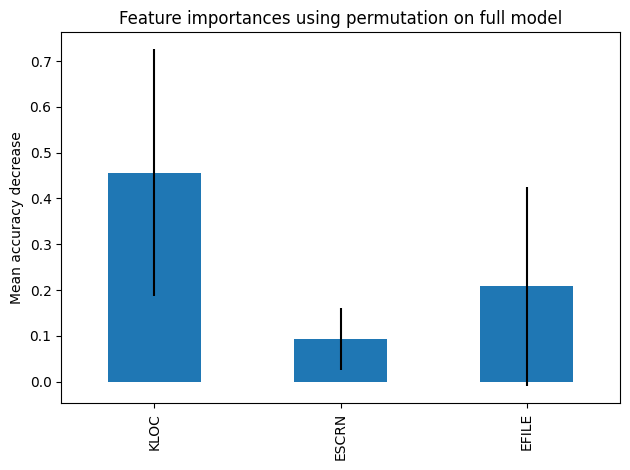

In [ ]:
# uso de permutation importance
permu = permutation_importance(modelo_gbr, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
permu_importances = pd.Series(permu.importances_mean.round(3), index=feature_names)[permu.importances_mean.round(3) > 0.000]
fig, ax = plt.subplots()
permu_importances.plot.bar(yerr=permu.importances_std[permu.importances_mean.round(3) > 0.000], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

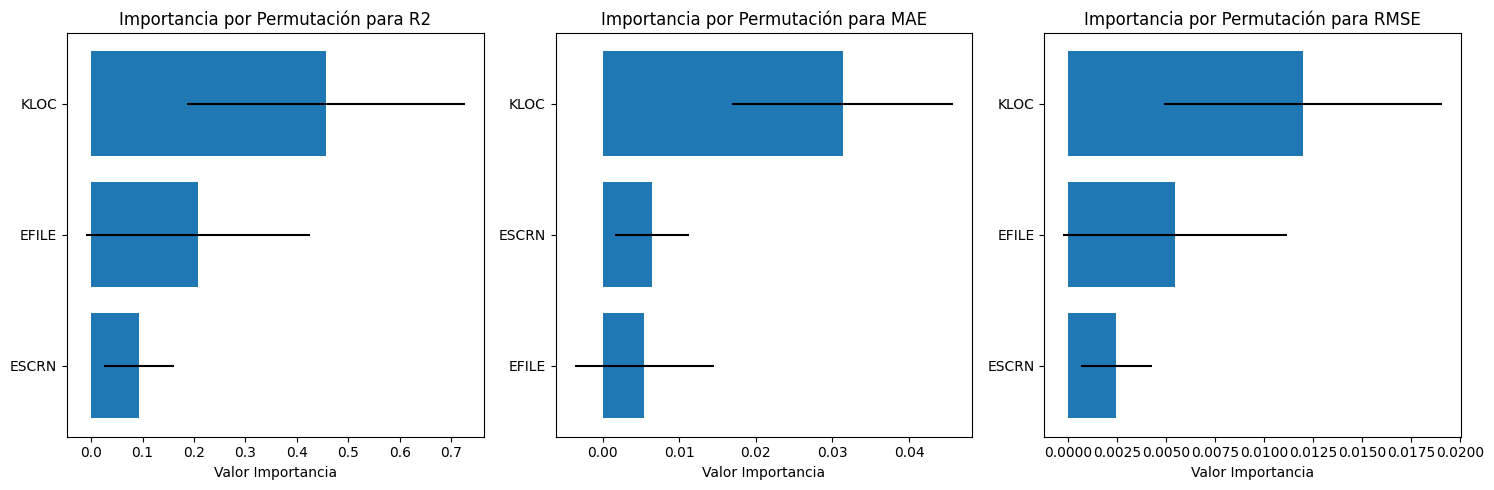

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
metric_names = ['R2', 'MAE', 'RMSE']

permu_score = permutation_importance(modelo_gbr, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera a través de las métricas
for i, metric in enumerate(scoring):
    permu = permu_score[metric]

    # Filtra las características que cumplen la condición
    filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
    sorted_feature_names = [feature_names[j] for j in filtered_indices]
    importances_mean = permu.importances_mean[filtered_indices]
    importances_std = permu.importances_std[filtered_indices]

    # Ordena los datos por importancia de mayor a menor
    sorted_indices = np.argsort(importances_mean)[::1]
    sorted_feature_names = [sorted_feature_names[j] for j in sorted_indices]
    importances_mean = importances_mean[sorted_indices]
    importances_std = importances_std[sorted_indices]

    # Crea la representación gráfica en el subplot correspondiente
    axs[i].barh(range(len(sorted_feature_names)), importances_mean, xerr=importances_std, align='center')
    axs[i].set_yticks(range(len(sorted_feature_names)))
    axs[i].set_yticklabels(sorted_feature_names)
    axs[i].set_xlabel('Valor Importancia')
    axs[i].set_title(f'Importancia por Permutación para {metric_names[i]}')

# Ajusta los espacios entre subplots y muestra la figura
plt.tight_layout()
plt.show()

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Crea un diccionario para almacenar los DataFrames
results_global_gbr = {}

permu_score = permutation_importance(modelo_gbr, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
for i, metric in enumerate(scoring):
  permu = permu_score[metric]

  # Filtra las características que cumplen la condición
  filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
  sorted_feature_names = [feature_names[j] for j in filtered_indices]
  importances_mean = permu.importances_mean[filtered_indices]
  importances_std = permu.importances_std[filtered_indices]



  # Crear un DataFrame con los resultados
  df_exp_global = pd.DataFrame({'Feature': sorted_feature_names,
                       'Importance_Mean': importances_mean,
                       'Importance_Std': importances_std})

  # Ordenar el DataFrame por importance_mean en orden descendente
  df_exp_global = df_exp_global.sort_values(by='Importance_Mean', ascending=False)

  # Asignar el DataFrame al diccionario con el nombre de la métrica
  results_global_gbr[f'df_global_{metric_names[i]}'] = df_exp_global

In [ ]:
results_global_gbr['df_global_R2']

,Feature,Importance_Mean,Importance_Std
0,KLOC,0.456213,0.269975
2,EFILE,0.207781,0.217931
1,ESCRN,0.093398,0.068240


In [ ]:
results_global_gbr['df_global_MAE']

,Feature,Importance_Mean,Importance_Std
0,KLOC,0.031319,0.014462
1,ESCRN,0.006457,0.004851
2,EFILE,0.005383,0.009079


In [ ]:
results_global_gbr['df_global_RMSE']

,Feature,Importance_Mean,Importance_Std
0,KLOC,0.011978,0.007088
2,EFILE,0.005455,0.005722
1,ESCRN,0.002452,0.001792


**BREAK-DOWN, SHAP Y LIME:**

In [ ]:
#primero definimos el explainer
exp = dx.Explainer(modelo_gbr, x_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 33 rows 6 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 33 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7948f633fc70> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.362, mean = -0.0907, max = 1.58
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.0947, mean = 0.167, max = 5.04
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Primero obtenemos las instancias con valor estimado máximo, minimo y en la mediana.
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)
mediana = np.median(y_pred)
#Encontrar el índice de la instancia cuyo valor estimado está en la mediana
median_index = np.argmin(np.abs(y_pred - mediana))

print("Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es: ", max_index)
print("El valor máximo obtenido es: ", y_pred[max_index])
print("Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es: ", min_index)
print("El valor mínimo obtenido es: ", y_pred[min_index])
print("Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana: ", median_index)
print("El valor de la mediana es: ", y_pred[median_index])

Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es:  2
El valor máximo obtenido es:  0.5081921766940526
Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es:  12
El valor mínimo obtenido es:  -0.35094496360324096
Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana:  4
El valor de la mediana es:  -0.0791787098733469


In [ ]:
df_instancia_max = x_test.iloc[max_index]
df_instancia_median = x_test.iloc[median_index]
df_instancia_min = x_test.iloc[min_index]

In [ ]:
breakdown_max = exp.predict_parts(df_instancia_max, type="break_down",random_state=42)
breakdown_median = exp.predict_parts(df_instancia_median, type="break_down",random_state=42)
breakdown_min = exp.predict_parts(df_instancia_min, type="break_down",random_state=42)

shap_max = exp.predict_parts(df_instancia_max, type="shap",random_state=42)
shap_median = exp.predict_parts(df_instancia_median, type="shap",random_state=42)
shap_min = exp.predict_parts(df_instancia_min, type="shap",random_state=42)

lime_max = exp.predict_surrogate(df_instancia_max, random_state=42)
lime_median = exp.predict_surrogate(df_instancia_median, random_state=42)
lime_min = exp.predict_surrogate(df_instancia_min, random_state=42)

breakdown_df_max = breakdown_max.result
shap_df_max = shap_max.result
lime_df_max=lime_max.result
breakdown_df_median = breakdown_median.result
shap_df_median = shap_median.result
lime_df_median= lime_median.result
breakdown_df_min = breakdown_min.result
shap_df_min = shap_min.result
lime_df_min = lime_min.result

In [ ]:
breakdown_max.plot()
breakdown_median.plot()
breakdown_min.plot()

In [ ]:
shap_max.plot()
shap_median.plot()
shap_min.plot()

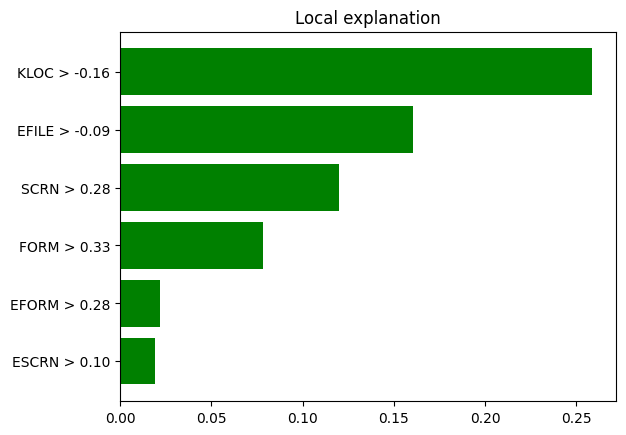

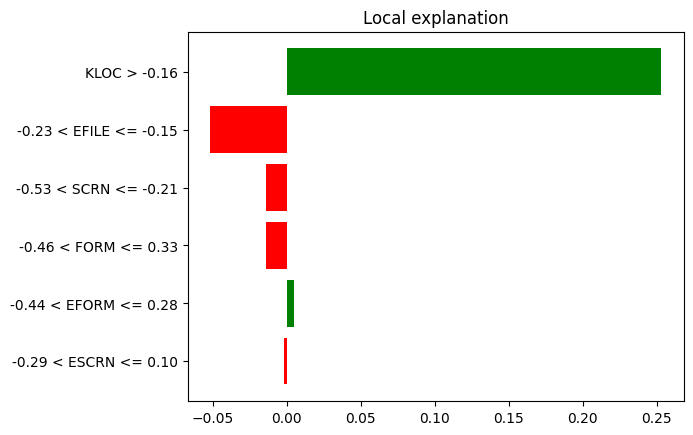

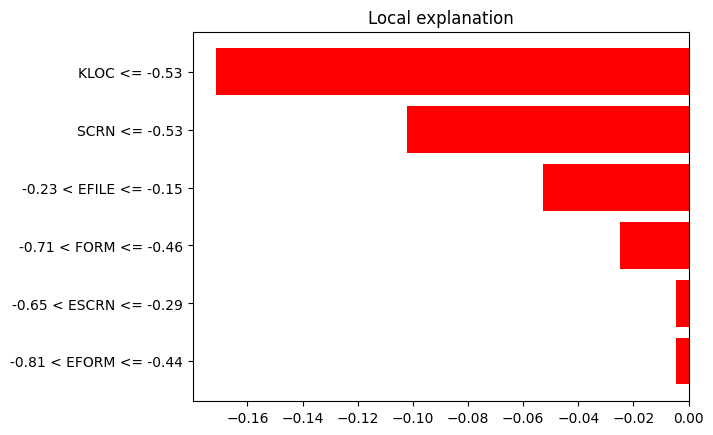

In [ ]:
lime_max.plot()
lime_median.plot()
lime_min.plot()

In [ ]:
lime_max.show_in_notebook()
lime_median.show_in_notebook()
lime_min.show_in_notebook()

### MAX:

In [ ]:
breakdown_df_max = breakdown_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_max = breakdown_df_max.drop(index=[0, 7])
breakdown_df_max['sign'] = breakdown_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_max = breakdown_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_max = shap_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_max = shap_df_max.tail(6)
shap_df_max['sign'] = shap_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_max = shap_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_max["Variable"] = lime_df_max["variable"].str.split(" ").str[0]
lime_df_max["Signo"] = lime_df_max["effect"].apply(evaluar_valor)
lime_df_max = lime_df_max.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_max = lime_df_max.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_max['Ranking'] = breakdown_df_max['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_max = breakdown_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_max['Ranking'] = shap_df_max['contribution'].abs().rank(ascending=False).astype(int)
shap_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_max = shap_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_max['Ranking'] = lime_df_max['effect'].abs().rank(ascending=False).astype(int)
lime_df_max = lime_df_max.head(5)
lime_df_max = lime_df_max[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_max = breakdown_df_max.drop(columns=['contribution'])
shap_df_max = shap_df_max.drop(columns=['contribution'])
lime_df_max = lime_df_max.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_max = breakdown_df_max.head(5)
breakdown_df_max = breakdown_df_max.reset_index(drop=True)

shap_df_max = shap_df_max.head(5)
shap_df_max = shap_df_max.reset_index(drop=True)

lime_df_max = lime_df_max.reset_index(drop=True)

print(breakdown_df_max)
print(shap_df_max)
print(lime_df_max)

  Variable  Ranking     Signo
0     KLOC        1  Positivo
1     SCRN        2  Positivo
2     FORM        3  Positivo
3    EFILE        4  Positivo
4    EFORM        5  Positivo
  Variable  Ranking     Signo
0     KLOC        1  Positivo
1     SCRN        2  Positivo
2    EFILE        3  Positivo
3    EFORM        4  Positivo
4     FORM        5  Positivo
  Variable  Ranking     Signo
0     KLOC        1  Positivo
1    EFILE        2  Positivo
2     SCRN        3  Positivo
3     FORM        4  Positivo
4    EFORM        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_max['Variable'])
shapley_features = list(shap_df_max['Variable'])
lime_features = list(lime_df_max['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_max = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_max['Variable'] = list(all_features)
df_final_max= df_final_max[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_max['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_max[breakdown_df_max['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_max[shap_df_max['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_max[lime_df_max['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_max

['KLOC', 'SCRN', 'FORM', 'EFILE', 'EFORM']
['KLOC', 'SCRN', 'EFILE', 'EFORM', 'FORM']
['KLOC', 'EFILE', 'SCRN', 'FORM', 'EFORM']
['EFORM', 'KLOC', 'SCRN', 'FORM', 'EFILE']


Variable Breakdown           Shapley              Lime          
             Ranking     Signo Ranking     Signo Ranking     Signo
0    EFORM         5  Positivo       4  Positivo       5  Positivo
1     KLOC         1  Positivo       1  Positivo       1  Positivo
2     SCRN         2  Positivo       2  Positivo       3  Positivo
3     FORM         3  Positivo       5  Positivo       4  Positivo
4    EFILE         4  Positivo       3  Positivo       2  Positivo

In [ ]:
df_final_max.set_index('Variable', inplace=True)
nuevo_orden = ["KLOC", "SCRN", "FORM", "EFILE", "EFORM"]

# Reorganizar el DataFrame según el nuevo orden
df_final_max = df_final_max.reindex(nuevo_orden)

df_final_max

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
KLOC             1  Positivo       1  Positivo       1  Positivo
SCRN             2  Positivo       2  Positivo       3  Positivo
FORM             3  Positivo       5  Positivo       4  Positivo
EFILE            4  Positivo       3  Positivo       2  Positivo
EFORM            5  Positivo       4  Positivo       5  Positivo

### MEDIAN:

In [ ]:
breakdown_df_median = breakdown_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_median = breakdown_df_median.drop(index=[0, 7])
breakdown_df_median['sign'] = breakdown_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_median = breakdown_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_median = shap_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_median = shap_df_median.tail(6)
shap_df_median['sign'] = shap_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_median = shap_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_median["Variable"] = lime_df_median["variable"].str.split(" ").str[0]
lime_df_median["Signo"] = lime_df_median["effect"].apply(evaluar_valor)
lime_df_median = lime_df_median.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_median = lime_df_median.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_median['Ranking'] = breakdown_df_median['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_median = breakdown_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_median['Ranking'] = shap_df_median['contribution'].abs().rank(ascending=False).astype(int)
shap_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_median = shap_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_median['Ranking'] = lime_df_median['effect'].abs().rank(ascending=False).astype(int)
lime_df_median = lime_df_median.head(5)
lime_df_median = lime_df_median[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_median = breakdown_df_median.drop(columns=['contribution'])
shap_df_median = shap_df_median.drop(columns=['contribution'])
lime_df_median = lime_df_median.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_median = breakdown_df_median.head(5)
breakdown_df_median = breakdown_df_median.reset_index(drop=True)

shap_df_median = shap_df_median.head(5)
shap_df_median = shap_df_median.reset_index(drop=True)

lime_df_median = lime_df_median.reset_index(drop=True)
lime_df_median.at[1, "Variable"]="EFILE"
lime_df_median.at[2, "Variable"]="SCRN"
lime_df_median.at[3, "Variable"]="FORM"
lime_df_median.at[4, "Variable"]="EFORM"

print(breakdown_df_median)
print(shap_df_median)
print(lime_df_median)

  Variable  Ranking     Signo
0     KLOC        1  Positivo
1    EFILE        2  Negativo
2     FORM        3  Negativo
3    EFORM        4  Negativo
4    ESCRN        5  Negativo
  Variable  Ranking     Signo
0     KLOC        1  Positivo
1    EFILE        2  Negativo
2     FORM        3  Negativo
3    ESCRN        4  Negativo
4     SCRN        5  Negativo
  Variable  Ranking     Signo
0     KLOC        1  Positivo
1    EFILE        2  Negativo
2     SCRN        3  Negativo
3     FORM        4  Negativo
4    EFORM        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_median['Variable'])
shapley_features = list(shap_df_median['Variable'])
lime_features = list(lime_df_median['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_median = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_median['Variable'] = list(all_features)
df_final_median= df_final_median[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_median['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_median[breakdown_df_median['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_median[shap_df_median['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_median[lime_df_median['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_median

['KLOC', 'EFILE', 'FORM', 'EFORM', 'ESCRN']
['KLOC', 'EFILE', 'FORM', 'ESCRN', 'SCRN']
['KLOC', 'EFILE', 'SCRN', 'FORM', 'EFORM']
['ESCRN', 'EFORM', 'KLOC', 'SCRN', 'FORM', 'EFILE']


Variable Breakdown           Shapley              Lime          
             Ranking     Signo Ranking     Signo Ranking     Signo
0    ESCRN         5  Negativo       4  Negativo       -         -
1    EFORM         4  Negativo       -         -       5  Positivo
2     KLOC         1  Positivo       1  Positivo       1  Positivo
3     SCRN         -         -       5  Negativo       3  Negativo
4     FORM         3  Negativo       3  Negativo       4  Negativo
5    EFILE         2  Negativo       2  Negativo       2  Negativo

In [ ]:
df_final_median.set_index('Variable', inplace=True)
nuevo_orden = ["KLOC", "EFILE", "FORM", "EFORM", "ESCRN", "SCRN"]

# Reorganizar el DataFrame según el nuevo orden
df_final_median = df_final_median.reindex(nuevo_orden)

df_final_median

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
KLOC             1  Positivo       1  Positivo       1  Positivo
EFILE            2  Negativo       2  Negativo       2  Negativo
FORM             3  Negativo       3  Negativo       4  Negativo
EFORM            4  Negativo       -         -       5  Positivo
ESCRN            5  Negativo       4  Negativo       -         -
SCRN             -         -       5  Negativo       3  Negativo

### MIN:

In [ ]:
breakdown_df_min = breakdown_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_min = breakdown_df_min.drop(index=[0, 7])
breakdown_df_min['sign'] = breakdown_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_min = breakdown_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_min = shap_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_min = shap_df_min.tail(6)
shap_df_min['sign'] = shap_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_min = shap_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_min["Variable"] = lime_df_min["variable"].str.split(" ").str[0]
lime_df_min["Signo"] = lime_df_min["effect"].apply(evaluar_valor)
lime_df_min = lime_df_min.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_min = lime_df_min.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_min['Ranking'] = breakdown_df_min['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_min = breakdown_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_min['Ranking'] = shap_df_min['contribution'].abs().rank(ascending=False).astype(int)
shap_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_min = shap_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_min['Ranking'] = lime_df_min['effect'].abs().rank(ascending=False).astype(int)
lime_df_min = lime_df_min.head(5)
lime_df_min = lime_df_min[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_min = breakdown_df_min.drop(columns=['contribution'])
shap_df_min = shap_df_min.drop(columns=['contribution'])
lime_df_min = lime_df_min.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_min = breakdown_df_min.head(5)
breakdown_df_min = breakdown_df_min.reset_index(drop=True)

shap_df_min = shap_df_min.head(5)
shap_df_min = shap_df_min.reset_index(drop=True)

lime_df_min = lime_df_min.reset_index(drop=True)
lime_df_min.at[2, "Variable"]="EFILE"
lime_df_min.at[3, "Variable"]="FORM"
lime_df_min.at[4, "Variable"]="ESCRN"

print(breakdown_df_min)
print(shap_df_min)
print(lime_df_min)

  Variable  Ranking     Signo
0     KLOC        1  Negativo
1     SCRN        2  Negativo
2    EFILE        3  Negativo
3    EFORM        4  Negativo
4     FORM        5  Negativo
  Variable  Ranking     Signo
0     KLOC        1  Negativo
1     SCRN        2  Negativo
2     FORM        3  Negativo
3    EFILE        4  Negativo
4    EFORM        5  Negativo
  Variable  Ranking     Signo
0     KLOC        1  Negativo
1     SCRN        2  Negativo
2    EFILE        3  Negativo
3     FORM        4  Negativo
4    ESCRN        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_min['Variable'])
shapley_features = list(shap_df_min['Variable'])
lime_features = list(lime_df_min['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_min = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_min['Variable'] = list(all_features)
df_final_min= df_final_min[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_min['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_min[breakdown_df_min['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_min[shap_df_min['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_min[lime_df_min['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_min

['KLOC', 'SCRN', 'EFILE', 'EFORM', 'FORM']
['KLOC', 'SCRN', 'FORM', 'EFILE', 'EFORM']
['KLOC', 'SCRN', 'EFILE', 'FORM', 'ESCRN']
['ESCRN', 'EFORM', 'KLOC', 'SCRN', 'FORM', 'EFILE']


Variable Breakdown           Shapley              Lime          
             Ranking     Signo Ranking     Signo Ranking     Signo
0    ESCRN         -         -       -         -       5  Negativo
1    EFORM         4  Negativo       5  Negativo       -         -
2     KLOC         1  Negativo       1  Negativo       1  Negativo
3     SCRN         2  Negativo       2  Negativo       2  Negativo
4     FORM         5  Negativo       3  Negativo       4  Negativo
5    EFILE         3  Negativo       4  Negativo       3  Negativo

In [ ]:
df_final_min.set_index('Variable', inplace=True)
nuevo_orden = ["KLOC", "SCRN", "EFILE", "EFORM", "FORM", "ESCRN"]

# Reorganizar el DataFrame según el nuevo orden
df_final_min = df_final_min.reindex(nuevo_orden)

df_final_min

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
KLOC             1  Negativo       1  Negativo       1  Negativo
SCRN             2  Negativo       2  Negativo       2  Negativo
EFILE            3  Negativo       4  Negativo       3  Negativo
EFORM            4  Negativo       5  Negativo       -         -
FORM             5  Negativo       3  Negativo       4  Negativo
ESCRN            -         -       -         -       5  Negativo

### GLOBAL

In [ ]:
ranking_valores = {
    'Breakdown': [],
    'Shapley': [],
    'Lime': []
}

# Recorre los DataFrames y almacena los pares de valores por técnica
for tecnica in ranking_valores:
    for caracteristica in df_final_max.index:
        ranking = df_final_max[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_median.index:
        ranking = df_final_median[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_min.index:
        ranking = df_final_min[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

# Calcula el ranking medio por técnica y característica
ranking_medio = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, ranking in ranking_values:
        if caracteristica not in ranking_medio[tecnica]:
            ranking_medio[tecnica][caracteristica] = [ranking]
        else:
            ranking_medio[tecnica][caracteristica].append(ranking)

for tecnica, ranking_values in ranking_medio.items():
    for caracteristica in ranking_values:
        ranking_medio[tecnica][caracteristica] = sum(ranking_values[caracteristica]) / len(ranking_values[caracteristica])


# Ahora el conteo de apariciones por característica y técnica
apariciones_count = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, _ in ranking_values:
        if caracteristica not in apariciones_count[tecnica]:
            apariciones_count[tecnica][caracteristica] = 1
        else:
            apariciones_count[tecnica][caracteristica] += 1

# Tengo los valores, los conteos de apariciones y los ranking medios por técnica en los respectivos diccionarios
print(ranking_valores)
print(apariciones_count)
print(ranking_medio)

{'Breakdown': [('KLOC', 1), ('SCRN', 2), ('FORM', 3), ('EFILE', 4), ('EFORM', 5), ('KLOC', 1), ('EFILE', 2), ('FORM', 3), ('EFORM', 4), ('ESCRN', 5), ('KLOC', 1), ('SCRN', 2), ('EFILE', 3), ('EFORM', 4), ('FORM', 5)], 'Shapley': [('KLOC', 1), ('SCRN', 2), ('FORM', 5), ('EFILE', 3), ('EFORM', 4), ('KLOC', 1), ('EFILE', 2), ('FORM', 3), ('ESCRN', 4), ('SCRN', 5), ('KLOC', 1), ('SCRN', 2), ('EFILE', 4), ('EFORM', 5), ('FORM', 3)], 'Lime': [('KLOC', 1), ('SCRN', 3), ('FORM', 4), ('EFILE', 2), ('EFORM', 5), ('KLOC', 1), ('EFILE', 2), ('FORM', 4), ('EFORM', 5), ('SCRN', 3), ('KLOC', 1), ('SCRN', 2), ('EFILE', 3), ('FORM', 4), ('ESCRN', 5)]}
{'Breakdown': {'KLOC': 3, 'SCRN': 2, 'FORM': 3, 'EFILE': 3, 'EFORM': 3, 'ESCRN': 1}, 'Shapley': {'KLOC': 3, 'SCRN': 3, 'FORM': 3, 'EFILE': 3, 'EFORM': 2, 'ESCRN': 1}, 'Lime': {'KLOC': 3, 'SCRN': 3, 'FORM': 3, 'EFILE': 3, 'EFORM': 2, 'ESCRN': 1}}
{'Breakdown': {'KLOC': 1.0, 'SCRN': 2.0, 'FORM': 3.6666666666666665, 'EFILE': 3.0, 'EFORM': 4.333333333333333, 

In [ ]:
# Lista de técnicas
techniques = ['Breakdown', 'Shapley', 'Lime']

# Diccionario para almacenar los datos
data_dict = {}

# Crear una lista de todas las características
all_caract = list(set().union(*[set(ranking_medio[technique]) for technique in techniques]))

# Recorrer las técnicas y las características
for technique in techniques:
    caract = list(ranking_medio[technique].keys())
    rank = [ranking_medio[technique].get(c, "-") for c in all_caract]
    apar = [apariciones_count[technique].get(c, "-") for c in all_caract]

    # Agregar los datos al diccionario
    data_dict[(technique, "Ranking Medio")] = rank
    data_dict[(technique, "Conteo")] = apar

# Crear el DataFrame resumen
df_resumen_gbr = pd.DataFrame(data_dict, index=all_caract)

df_resumen_gbr

Breakdown              Shapley                 Lime       
      Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo
EFILE      3.000000      3      3.000000      3      2.333333      3
FORM       3.666667      3      3.666667      3      4.000000      3
SCRN       2.000000      2      3.000000      3      2.666667      3
KLOC       1.000000      3      1.000000      3      1.000000      3
EFORM      4.333333      3      4.500000      2      5.000000      2
ESCRN      5.000000      1      4.000000      1      5.000000      1

In [ ]:
# Calcular el ranking medio general omitiendo los valores "-"
df_resumen_gbr[("General", "Ranking")] = df_resumen_gbr[[(tech, "Ranking Medio") for tech in techniques]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_gbr[("General", "Conteo Total")] = df_resumen_gbr[[(tech, "Conteo") for tech in techniques]].replace('-', 0).sum(axis=1)

# Mostrar el DataFrame resumen actualizado
df_resumen_gbr

Breakdown              Shapley                 Lime         \
      Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
EFILE      3.000000      3      3.000000      3      2.333333      3   
FORM       3.666667      3      3.666667      3      4.000000      3   
SCRN       2.000000      2      3.000000      3      2.666667      3   
KLOC       1.000000      3      1.000000      3      1.000000      3   
EFORM      4.333333      3      4.500000      2      5.000000      2   
ESCRN      5.000000      1      4.000000      1      5.000000      1   

        General               
        Ranking Conteo Total  
EFILE  2.777778            9  
FORM   3.777778            9  
SCRN   2.555556            8  
KLOC   1.000000            9  
EFORM  4.611111            7  
ESCRN  4.666667            3

In [ ]:
# Obtener el número de características
num_caract = df_resumen_gbr.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_gbr[("General", "Peso Rango")] = 1 - ((df_resumen_gbr[("General", "Ranking")].rank(ascending=True) - 1) / num_caract)
df_resumen_gbr[("General", "Peso Conteo")] = df_resumen_gbr[("General", "Conteo Total")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_gbr[("General", "Puntaje")] = df_resumen_gbr[("General", "Peso Rango")] + df_resumen_gbr[("General", "Peso Conteo")]
df_resumen_gbr[("General", "Ranking")] = df_resumen_gbr[("General", "Puntaje")].rank(ascending=False, method="min")

# Eliminar la subcolumnas innecesarias
df_resumen_gbr.drop("Peso Rango", axis=1, level=1, inplace=True)
df_resumen_gbr.drop("Peso Conteo", axis=1, level=1, inplace=True)
df_resumen_gbr.drop("Puntaje", axis=1, level=1, inplace=True)

df_resumen_gbr

Breakdown              Shapley                 Lime        General  \
      Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo Ranking   
EFILE      3.000000      3      3.000000      3      2.333333      3     2.0   
FORM       3.666667      3      3.666667      3      4.000000      3     3.0   
SCRN       2.000000      2      3.000000      3      2.666667      3     3.0   
KLOC       1.000000      3      1.000000      3      1.000000      3     1.0   
EFORM      4.333333      3      4.500000      2      5.000000      2     5.0   
ESCRN      5.000000      1      4.000000      1      5.000000      1     6.0   

                    
      Conteo Total  
EFILE            9  
FORM             9  
SCRN             8  
KLOC             9  
EFORM            7  
ESCRN            3

In [ ]:
# Obtener las columnas actuales del DataFrame
columns = df_resumen_gbr.columns

# Extraer las columnas de "General" y sus subcolumnas
general_columns = columns.get_level_values(0) == "General"

# Crear una lista con las subcolumnas de "General"
general_subcolumns = [("General", "Ranking"), ("General", "Conteo Total")]

# Crear una lista con las subcolumnas asociadas a las técnicas
technique_subcolumns = list(columns[~general_columns])

# Reorganizar las columnas para mover "General" al principio
new_columns = general_subcolumns + technique_subcolumns

# Crear un nuevo DataFrame con las columnas reorganizadas
df_resumen_gbr = df_resumen_gbr[new_columns]

In [ ]:
df_resumen_gbr.sort_values(by=("General", "Ranking"), ascending=True, inplace=True)

# Formatear los valores
for tech in techniques:
    df_resumen_gbr[(tech, "Ranking Medio")] = df_resumen_gbr[(tech, "Ranking Medio")].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

df_resumen_gbr

General                  Breakdown              Shapley         \
      Ranking Conteo Total Ranking Medio Conteo Ranking Medio Conteo   
KLOC      1.0            9          1.00      3          1.00      3   
EFILE     2.0            9          3.00      3          3.00      3   
FORM      3.0            9          3.67      3          3.67      3   
SCRN      3.0            8          2.00      2          3.00      3   
EFORM     5.0            7          4.33      3          4.50      2   
ESCRN     6.0            3          5.00      1          4.00      1   

               Lime         
      Ranking Medio Conteo  
KLOC           1.00      3  
EFILE          2.33      3  
FORM           4.00      3  
SCRN           2.67      3  
EFORM          5.00      2  
ESCRN          5.00      1

## **Voting:**

**FEATURE IMPORTANCE:**

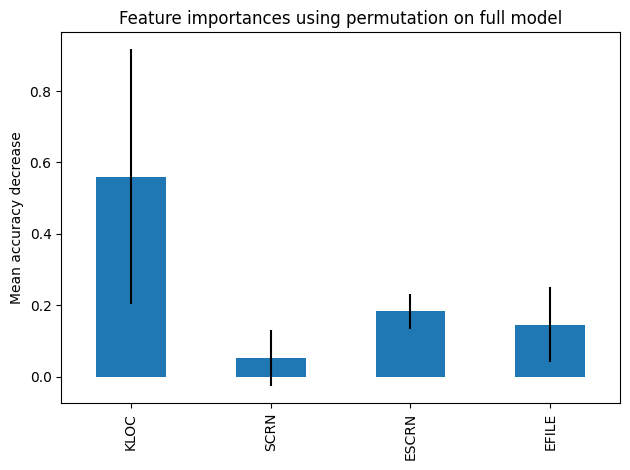

In [ ]:
#uso de permutation importance
permu = permutation_importance(modelo_voting, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
permu_importances = pd.Series(permu.importances_mean.round(3), index=feature_names)[permu.importances_mean.round(3) > 0.000]
fig, ax = plt.subplots()
permu_importances.plot.bar(yerr=permu.importances_std[permu.importances_mean.round(3) > 0.000], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

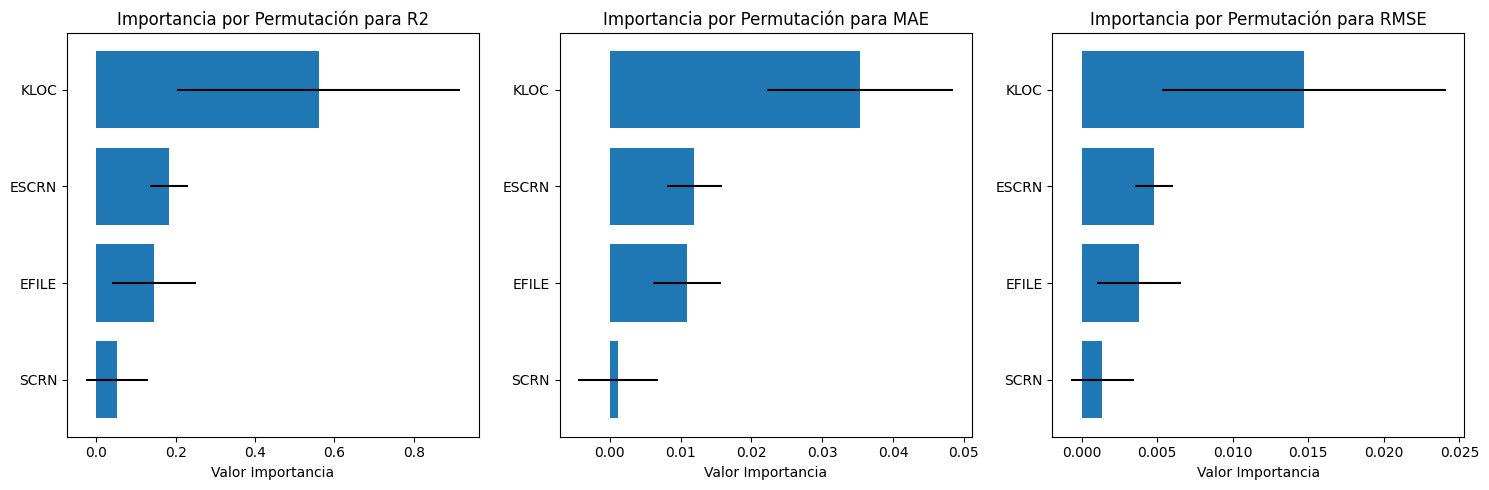

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
metric_names = ['R2', 'MAE', 'RMSE']

permu_score = permutation_importance(modelo_voting, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera a través de las métricas
for i, metric in enumerate(scoring):
    permu = permu_score[metric]

    # Filtra las características que cumplen la condición
    filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
    sorted_feature_names = [feature_names[j] for j in filtered_indices]
    importances_mean = permu.importances_mean[filtered_indices]
    importances_std = permu.importances_std[filtered_indices]

    # Ordena los datos por importancia de mayor a menor
    sorted_indices = np.argsort(importances_mean)[::1]
    sorted_feature_names = [sorted_feature_names[j] for j in sorted_indices]
    importances_mean = importances_mean[sorted_indices]
    importances_std = importances_std[sorted_indices]

    # Crea la representación gráfica en el subplot correspondiente
    axs[i].barh(range(len(sorted_feature_names)), importances_mean, xerr=importances_std, align='center')
    axs[i].set_yticks(range(len(sorted_feature_names)))
    axs[i].set_yticklabels(sorted_feature_names)
    axs[i].set_xlabel('Valor Importancia')
    axs[i].set_title(f'Importancia por Permutación para {metric_names[i]}')

# Ajusta los espacios entre subplots y muestra la figura
plt.tight_layout()
plt.show()

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Crea un diccionario para almacenar los DataFrames
results_global_vot = {}

permu_score = permutation_importance(modelo_voting, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
for i, metric in enumerate(scoring):
  permu = permu_score[metric]

  # Filtra las características que cumplen la condición
  filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
  sorted_feature_names = [feature_names[j] for j in filtered_indices]
  importances_mean = permu.importances_mean[filtered_indices]
  importances_std = permu.importances_std[filtered_indices]



  # Crear un DataFrame con los resultados
  df_exp_global = pd.DataFrame({'Feature': sorted_feature_names,
                       'Importance_Mean': importances_mean,
                       'Importance_Std': importances_std})

  # Ordenar el DataFrame por importance_mean en orden descendente
  df_exp_global = df_exp_global.sort_values(by='Importance_Mean', ascending=False)

  # Asignar el DataFrame al diccionario con el nombre de la métrica
  results_global_vot[f'df_global_{metric_names[i]}'] = df_exp_global

In [ ]:
results_global_vot['df_global_R2']

,Feature,Importance_Mean,Importance_Std
0,KLOC,0.560269,0.357363
2,ESCRN,0.182904,0.048501
3,EFILE,0.145098,0.105410
1,SCRN,0.052261,0.078771


In [ ]:
results_global_vot['df_global_MAE']

,Feature,Importance_Mean,Importance_Std
0,KLOC,0.035331,0.013152
2,ESCRN,0.011933,0.003917
3,EFILE,0.010875,0.004847
1,SCRN,0.001200,0.005649


In [ ]:
results_global_vot['df_global_RMSE']

,Feature,Importance_Mean,Importance_Std
0,KLOC,0.014710,0.009383
2,ESCRN,0.004802,0.001273
3,EFILE,0.003810,0.002768
1,SCRN,0.001372,0.002068


**BREAK-DOWN, SHAP Y LIME:**

In [ ]:
#primero definimos el explainer
exp = dx.Explainer(modelo_voting, x_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 33 rows 6 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 33 values
  -> model_class       : sklearn.ensemble._voting.VotingRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7948f633fc70> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.304, mean = -0.0497, max = 2.36
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.148, mean = 0.126, max = 4.26
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Primero obtenemos las instancias con valor estimado máximo, minimo y en la mediana.
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)
mediana = np.median(y_pred)
#Encontrar el índice de la instancia cuyo valor estimado está en la mediana
median_index = np.argmin(np.abs(y_pred - mediana))

print("Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es: ", max_index)
print("El valor máximo obtenido es: ", y_pred[max_index])
print("Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es: ", min_index)
print("El valor mínimo obtenido es: ", y_pred[min_index])
print("Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana: ", median_index)
print("El valor de la mediana es: ", y_pred[median_index])

Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es:  2
El valor máximo obtenido es:  0.47112311761134734
Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es:  12
El valor mínimo obtenido es:  -0.3029592825678999
Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana:  4
El valor de la mediana es:  -0.14073371317355


In [ ]:
df_instancia_max = x_test.iloc[max_index]
df_instancia_median = x_test.iloc[median_index]
df_instancia_min = x_test.iloc[min_index]

In [ ]:
breakdown_max = exp.predict_parts(df_instancia_max, type="break_down",random_state=42)
breakdown_median = exp.predict_parts(df_instancia_median, type="break_down",random_state=42)
breakdown_min = exp.predict_parts(df_instancia_min, type="break_down",random_state=42)

shap_max = exp.predict_parts(df_instancia_max, type="shap",random_state=42)
shap_median = exp.predict_parts(df_instancia_median, type="shap",random_state=42)
shap_min = exp.predict_parts(df_instancia_min, type="shap",random_state=42)

lime_max = exp.predict_surrogate(df_instancia_max, random_state=42)
lime_median = exp.predict_surrogate(df_instancia_median, random_state=42)
lime_min = exp.predict_surrogate(df_instancia_min, random_state=42)

breakdown_df_max = breakdown_max.result
shap_df_max = shap_max.result
lime_df_max=lime_max.result
breakdown_df_median = breakdown_median.result
shap_df_median = shap_median.result
lime_df_median= lime_median.result
breakdown_df_min = breakdown_min.result
shap_df_min = shap_min.result
lime_df_min = lime_min.result

In [ ]:
breakdown_max.plot()
breakdown_median.plot()
breakdown_min.plot()

In [ ]:
shap_max.plot()
shap_median.plot()
shap_min.plot()

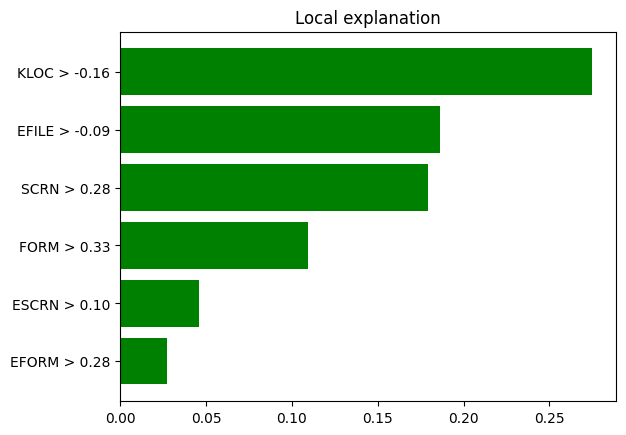

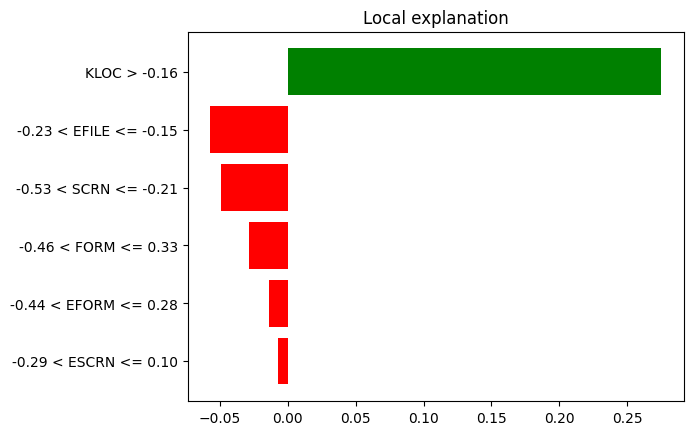

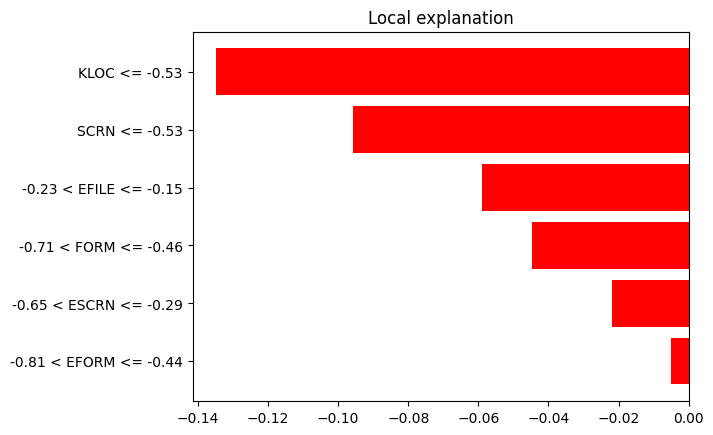

In [ ]:
lime_max.plot()
lime_median.plot()
lime_min.plot()

In [ ]:
lime_max.show_in_notebook()
lime_median.show_in_notebook()
lime_min.show_in_notebook()

### MAX:

In [ ]:
breakdown_df_max = breakdown_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_max = breakdown_df_max.drop(index=[0, 7])
breakdown_df_max['sign'] = breakdown_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_max = breakdown_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_max = shap_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_max = shap_df_max.tail(6)
shap_df_max['sign'] = shap_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_max = shap_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_max["Variable"] = lime_df_max["variable"].str.split(" ").str[0]
lime_df_max["Signo"] = lime_df_max["effect"].apply(evaluar_valor)
lime_df_max = lime_df_max.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_max = lime_df_max.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_max['Ranking'] = breakdown_df_max['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_max = breakdown_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_max['Ranking'] = shap_df_max['contribution'].abs().rank(ascending=False).astype(int)
shap_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_max = shap_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_max['Ranking'] = lime_df_max['effect'].abs().rank(ascending=False).astype(int)
lime_df_max = lime_df_max.head(5)
lime_df_max = lime_df_max[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_max = breakdown_df_max.drop(columns=['contribution'])
shap_df_max = shap_df_max.drop(columns=['contribution'])
lime_df_max = lime_df_max.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_max = breakdown_df_max.head(5)
breakdown_df_max = breakdown_df_max.reset_index(drop=True)

shap_df_max = shap_df_max.head(5)
shap_df_max = shap_df_max.reset_index(drop=True)

lime_df_max = lime_df_max.reset_index(drop=True)

print(breakdown_df_max)
print(shap_df_max)
print(lime_df_max)

  Variable  Ranking     Signo
0     KLOC        1  Positivo
1     SCRN        2  Positivo
2    EFORM        3  Positivo
3    ESCRN        4  Negativo
4     FORM        5  Positivo
  Variable  Ranking     Signo
0     KLOC        1  Positivo
1     SCRN        2  Positivo
2    EFORM        3  Positivo
3    ESCRN        4  Negativo
4     FORM        5  Positivo
  Variable  Ranking     Signo
0     KLOC        1  Positivo
1    EFILE        2  Positivo
2     SCRN        3  Positivo
3     FORM        4  Positivo
4    ESCRN        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_max['Variable'])
shapley_features = list(shap_df_max['Variable'])
lime_features = list(lime_df_max['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_max = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_max['Variable'] = list(all_features)
df_final_max= df_final_max[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_max['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_max[breakdown_df_max['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_max[shap_df_max['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_max[lime_df_max['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_max

['KLOC', 'SCRN', 'EFORM', 'ESCRN', 'FORM']
['KLOC', 'SCRN', 'EFORM', 'ESCRN', 'FORM']
['KLOC', 'EFILE', 'SCRN', 'FORM', 'ESCRN']
['ESCRN', 'EFORM', 'KLOC', 'SCRN', 'FORM', 'EFILE']


Variable Breakdown           Shapley              Lime          
             Ranking     Signo Ranking     Signo Ranking     Signo
0    ESCRN         4  Negativo       4  Negativo       5  Positivo
1    EFORM         3  Positivo       3  Positivo       -         -
2     KLOC         1  Positivo       1  Positivo       1  Positivo
3     SCRN         2  Positivo       2  Positivo       3  Positivo
4     FORM         5  Positivo       5  Positivo       4  Positivo
5    EFILE         -         -       -         -       2  Positivo

In [ ]:
df_final_max.set_index('Variable', inplace=True)
nuevo_orden = ["KLOC", "SCRN", "EFORM", "ESCRN", "FORM", "EFILE"]

# Reorganizar el DataFrame según el nuevo orden
df_final_max = df_final_max.reindex(nuevo_orden)

df_final_max

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
KLOC             1  Positivo       1  Positivo       1  Positivo
SCRN             2  Positivo       2  Positivo       3  Positivo
EFORM            3  Positivo       3  Positivo       -         -
ESCRN            4  Negativo       4  Negativo       5  Positivo
FORM             5  Positivo       5  Positivo       4  Positivo
EFILE            -         -       -         -       2  Positivo

### MEDIAN:

In [ ]:
breakdown_df_median = breakdown_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_median = breakdown_df_median.drop(index=[0, 7])
breakdown_df_median['sign'] = breakdown_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_median = breakdown_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_median = shap_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_median = shap_df_median.tail(6)
shap_df_median['sign'] = shap_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_median = shap_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_median["Variable"] = lime_df_median["variable"].str.split(" ").str[0]
lime_df_median["Signo"] = lime_df_median["effect"].apply(evaluar_valor)
lime_df_median = lime_df_median.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_median = lime_df_median.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_median['Ranking'] = breakdown_df_median['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_median = breakdown_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_median['Ranking'] = shap_df_median['contribution'].abs().rank(ascending=False).astype(int)
shap_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_median = shap_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_median['Ranking'] = lime_df_median['effect'].abs().rank(ascending=False).astype(int)
lime_df_median = lime_df_median.head(5)
lime_df_median = lime_df_median[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_median = breakdown_df_median.drop(columns=['contribution'])
shap_df_median = shap_df_median.drop(columns=['contribution'])
lime_df_median = lime_df_median.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_median = breakdown_df_median.head(5)
breakdown_df_median = breakdown_df_median.reset_index(drop=True)

shap_df_median = shap_df_median.head(5)
shap_df_median = shap_df_median.reset_index(drop=True)

lime_df_median = lime_df_median.reset_index(drop=True)
lime_df_median.at[1, "Variable"] = "EFILE"
lime_df_median.at[2, "Variable"] = "SCRN"
lime_df_median.at[3, "Variable"] = "FORM"
lime_df_median.at[4, "Variable"] = "EFORM"

print(breakdown_df_median)
print(shap_df_median)
print(lime_df_median)

  Variable  Ranking     Signo
0     FORM        1  Negativo
1    EFILE        2  Negativo
2     SCRN        3  Negativo
3     KLOC        4  Positivo
4    ESCRN        5  Negativo
  Variable  Ranking     Signo
0     FORM        1  Negativo
1    EFILE        2  Negativo
2     SCRN        3  Negativo
3     KLOC        4  Positivo
4    ESCRN        5  Negativo
  Variable  Ranking     Signo
0     KLOC        1  Positivo
1    EFILE        2  Negativo
2     SCRN        3  Negativo
3     FORM        4  Negativo
4    EFORM        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_median['Variable'])
shapley_features = list(shap_df_median['Variable'])
lime_features = list(lime_df_median['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_median = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_median['Variable'] = list(all_features)
df_final_median= df_final_median[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_median['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_median[breakdown_df_median['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_median[shap_df_median['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_median[lime_df_median['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_median

['FORM', 'EFILE', 'SCRN', 'KLOC', 'ESCRN']
['FORM', 'EFILE', 'SCRN', 'KLOC', 'ESCRN']
['KLOC', 'EFILE', 'SCRN', 'FORM', 'EFORM']
['ESCRN', 'EFORM', 'KLOC', 'SCRN', 'FORM', 'EFILE']


Variable Breakdown           Shapley              Lime          
             Ranking     Signo Ranking     Signo Ranking     Signo
0    ESCRN         5  Negativo       5  Negativo       -         -
1    EFORM         -         -       -         -       5  Negativo
2     KLOC         4  Positivo       4  Positivo       1  Positivo
3     SCRN         3  Negativo       3  Negativo       3  Negativo
4     FORM         1  Negativo       1  Negativo       4  Negativo
5    EFILE         2  Negativo       2  Negativo       2  Negativo

In [ ]:
df_final_median.set_index('Variable', inplace=True)
nuevo_orden = ["FORM", "EFILE", "SCRN", "KLOC", "ESCRN", "EFORM"]

# Reorganizar el DataFrame según el nuevo orden
df_final_median = df_final_median.reindex(nuevo_orden)

df_final_median

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
FORM             1  Negativo       1  Negativo       4  Negativo
EFILE            2  Negativo       2  Negativo       2  Negativo
SCRN             3  Negativo       3  Negativo       3  Negativo
KLOC             4  Positivo       4  Positivo       1  Positivo
ESCRN            5  Negativo       5  Negativo       -         -
EFORM            -         -       -         -       5  Negativo

### MIN:

In [ ]:
breakdown_df_min = breakdown_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_min = breakdown_df_min.drop(index=[0, 7])
breakdown_df_min['sign'] = breakdown_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_min = breakdown_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_min = shap_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_min = shap_df_min.tail(6)
shap_df_min['sign'] = shap_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_min = shap_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_min["Variable"] = lime_df_min["variable"].str.split(" ").str[0]
lime_df_min["Signo"] = lime_df_min["effect"].apply(evaluar_valor)
lime_df_min = lime_df_min.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_min = lime_df_min.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_min['Ranking'] = breakdown_df_min['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_min = breakdown_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_min['Ranking'] = shap_df_min['contribution'].abs().rank(ascending=False).astype(int)
shap_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_min = shap_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_min['Ranking'] = lime_df_min['effect'].abs().rank(ascending=False).astype(int)
lime_df_min = lime_df_min.head(5)
lime_df_min = lime_df_min[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_min = breakdown_df_min.drop(columns=['contribution'])
shap_df_min = shap_df_min.drop(columns=['contribution'])
lime_df_min = lime_df_min.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_min = breakdown_df_min.head(5)
breakdown_df_min = breakdown_df_min.reset_index(drop=True)

shap_df_min = shap_df_min.head(5)
shap_df_min = shap_df_min.reset_index(drop=True)

lime_df_min = lime_df_min.reset_index(drop=True)
lime_df_min.at[2, "Variable"] = "EFILE"
lime_df_min.at[3, "Variable"] = "FORM"
lime_df_min.at[4, "Variable"] = "ESCRN"

print(breakdown_df_min)
print(shap_df_min)
print(lime_df_min)

  Variable  Ranking     Signo
0     KLOC        1  Negativo
1     SCRN        2  Negativo
2     FORM        3  Negativo
3    EFILE        4  Negativo
4    EFORM        5  Negativo
  Variable  Ranking     Signo
0     KLOC        1  Negativo
1     SCRN        2  Negativo
2     FORM        3  Negativo
3    EFILE        4  Negativo
4    ESCRN        5  Negativo
  Variable  Ranking     Signo
0     KLOC        1  Negativo
1     SCRN        2  Negativo
2    EFILE        3  Negativo
3     FORM        4  Negativo
4    ESCRN        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_min['Variable'])
shapley_features = list(shap_df_min['Variable'])
lime_features = list(lime_df_min['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_min = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_min['Variable'] = list(all_features)
df_final_min= df_final_min[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_min['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_min[breakdown_df_min['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_min[shap_df_min['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_min[lime_df_min['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_min

['KLOC', 'SCRN', 'FORM', 'EFILE', 'EFORM']
['KLOC', 'SCRN', 'FORM', 'EFILE', 'ESCRN']
['KLOC', 'SCRN', 'EFILE', 'FORM', 'ESCRN']
['ESCRN', 'EFORM', 'KLOC', 'SCRN', 'FORM', 'EFILE']


Variable Breakdown           Shapley              Lime          
             Ranking     Signo Ranking     Signo Ranking     Signo
0    ESCRN         -         -       5  Negativo       5  Negativo
1    EFORM         5  Negativo       -         -       -         -
2     KLOC         1  Negativo       1  Negativo       1  Negativo
3     SCRN         2  Negativo       2  Negativo       2  Negativo
4     FORM         3  Negativo       3  Negativo       4  Negativo
5    EFILE         4  Negativo       4  Negativo       3  Negativo

In [ ]:
df_final_min.set_index('Variable', inplace=True)
nuevo_orden = ["KLOC", "SCRN", "FORM", "EFILE", "EFORM", "ESCRN"]

# Reorganizar el DataFrame según el nuevo orden
df_final_min = df_final_min.reindex(nuevo_orden)

df_final_min

Breakdown           Shapley              Lime          
           Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                        
KLOC             1  Negativo       1  Negativo       1  Negativo
SCRN             2  Negativo       2  Negativo       2  Negativo
FORM             3  Negativo       3  Negativo       4  Negativo
EFILE            4  Negativo       4  Negativo       3  Negativo
EFORM            5  Negativo       -         -       -         -
ESCRN            -         -       5  Negativo       5  Negativo

### GLOBAL

In [ ]:
ranking_valores = {
    'Breakdown': [],
    'Shapley': [],
    'Lime': []
}

# Recorre los DataFrames y almacena los pares de valores por técnica
for tecnica in ranking_valores:
    for caracteristica in df_final_max.index:
        ranking = df_final_max[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_median.index:
        ranking = df_final_median[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_min.index:
        ranking = df_final_min[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

# Calcula el ranking medio por técnica y característica
ranking_medio = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, ranking in ranking_values:
        if caracteristica not in ranking_medio[tecnica]:
            ranking_medio[tecnica][caracteristica] = [ranking]
        else:
            ranking_medio[tecnica][caracteristica].append(ranking)

for tecnica, ranking_values in ranking_medio.items():
    for caracteristica in ranking_values:
        ranking_medio[tecnica][caracteristica] = sum(ranking_values[caracteristica]) / len(ranking_values[caracteristica])


# Ahora el conteo de apariciones por característica y técnica
apariciones_count = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, _ in ranking_values:
        if caracteristica not in apariciones_count[tecnica]:
            apariciones_count[tecnica][caracteristica] = 1
        else:
            apariciones_count[tecnica][caracteristica] += 1

# Tengo los valores, los conteos de apariciones y los ranking medios por técnica en los respectivos diccionarios
print(ranking_valores)
print(apariciones_count)
print(ranking_medio)

{'Breakdown': [('KLOC', 1), ('SCRN', 2), ('EFORM', 3), ('ESCRN', 4), ('FORM', 5), ('FORM', 1), ('EFILE', 2), ('SCRN', 3), ('KLOC', 4), ('ESCRN', 5), ('KLOC', 1), ('SCRN', 2), ('FORM', 3), ('EFILE', 4), ('EFORM', 5)], 'Shapley': [('KLOC', 1), ('SCRN', 2), ('EFORM', 3), ('ESCRN', 4), ('FORM', 5), ('FORM', 1), ('EFILE', 2), ('SCRN', 3), ('KLOC', 4), ('ESCRN', 5), ('KLOC', 1), ('SCRN', 2), ('FORM', 3), ('EFILE', 4), ('ESCRN', 5)], 'Lime': [('KLOC', 1), ('SCRN', 3), ('ESCRN', 5), ('FORM', 4), ('EFILE', 2), ('FORM', 4), ('EFILE', 2), ('SCRN', 3), ('KLOC', 1), ('EFORM', 5), ('KLOC', 1), ('SCRN', 2), ('FORM', 4), ('EFILE', 3), ('ESCRN', 5)]}
{'Breakdown': {'KLOC': 3, 'SCRN': 3, 'EFORM': 2, 'ESCRN': 2, 'FORM': 3, 'EFILE': 2}, 'Shapley': {'KLOC': 3, 'SCRN': 3, 'EFORM': 1, 'ESCRN': 3, 'FORM': 3, 'EFILE': 2}, 'Lime': {'KLOC': 3, 'SCRN': 3, 'ESCRN': 2, 'FORM': 3, 'EFILE': 3, 'EFORM': 1}}
{'Breakdown': {'KLOC': 2.0, 'SCRN': 2.3333333333333335, 'EFORM': 4.0, 'ESCRN': 4.5, 'FORM': 3.0, 'EFILE': 3.0}, 

In [ ]:
# Lista de técnicas
techniques = ['Breakdown', 'Shapley', 'Lime']

# Diccionario para almacenar los datos
data_dict = {}

# Crear una lista de todas las características
all_caract = list(set().union(*[set(ranking_medio[technique]) for technique in techniques]))

# Recorrer las técnicas y las características
for technique in techniques:
    caract = list(ranking_medio[technique].keys())
    rank = [ranking_medio[technique].get(c, "-") for c in all_caract]
    apar = [apariciones_count[technique].get(c, "-") for c in all_caract]

    # Agregar los datos al diccionario
    data_dict[(technique, "Ranking Medio")] = rank
    data_dict[(technique, "Conteo")] = apar

# Crear el DataFrame resumen
df_resumen_vot = pd.DataFrame(data_dict, index=all_caract)

df_resumen_vot

Breakdown              Shapley                 Lime       
      Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo
EFILE      3.000000      2      3.000000      2      2.333333      3
FORM       3.000000      3      3.000000      3      4.000000      3
SCRN       2.333333      3      2.333333      3      2.666667      3
KLOC       2.000000      3      2.000000      3      1.000000      3
EFORM      4.000000      2      3.000000      1      5.000000      1
ESCRN      4.500000      2      4.666667      3      5.000000      2

In [ ]:
# Calcular el ranking medio general omitiendo los valores "-"
df_resumen_vot[("General", "Ranking")] = df_resumen_vot[[(tech, "Ranking Medio") for tech in techniques]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_vot[("General", "Conteo Total")] = df_resumen_vot[[(tech, "Conteo") for tech in techniques]].replace('-', 0).sum(axis=1)

# Mostrar el DataFrame resumen actualizado
df_resumen_vot

Breakdown              Shapley                 Lime         \
      Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
EFILE      3.000000      2      3.000000      2      2.333333      3   
FORM       3.000000      3      3.000000      3      4.000000      3   
SCRN       2.333333      3      2.333333      3      2.666667      3   
KLOC       2.000000      3      2.000000      3      1.000000      3   
EFORM      4.000000      2      3.000000      1      5.000000      1   
ESCRN      4.500000      2      4.666667      3      5.000000      2   

        General               
        Ranking Conteo Total  
EFILE  2.777778            7  
FORM   3.333333            9  
SCRN   2.444444            9  
KLOC   1.666667            9  
EFORM  4.000000            4  
ESCRN  4.722222            7

In [ ]:
# Obtener el número de características
num_caract = df_resumen_vot.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_vot[("General", "Peso Rango")] = 1 - ((df_resumen_vot[("General", "Ranking")].rank(ascending=True) - 1) / num_caract)
df_resumen_vot[("General", "Peso Conteo")] = df_resumen_vot[("General", "Conteo Total")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_vot[("General", "Puntaje")] = df_resumen_vot[("General", "Peso Rango")] + df_resumen_vot[("General", "Peso Conteo")]
df_resumen_vot[("General", "Ranking")] = df_resumen_vot[("General", "Puntaje")].rank(ascending=False, method="min")

# Eliminar la subcolumnas innecesarias
df_resumen_vot.drop("Peso Rango", axis=1, level=1, inplace=True)
df_resumen_vot.drop("Peso Conteo", axis=1, level=1, inplace=True)
df_resumen_vot.drop("Puntaje", axis=1, level=1, inplace=True)

df_resumen_vot

Breakdown              Shapley                 Lime        General  \
      Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo Ranking   
EFILE      3.000000      2      3.000000      2      2.333333      3     4.0   
FORM       3.000000      3      3.000000      3      4.000000      3     3.0   
SCRN       2.333333      3      2.333333      3      2.666667      3     2.0   
KLOC       2.000000      3      2.000000      3      1.000000      3     1.0   
EFORM      4.000000      2      3.000000      1      5.000000      1     6.0   
ESCRN      4.500000      2      4.666667      3      5.000000      2     5.0   

                    
      Conteo Total  
EFILE            7  
FORM             9  
SCRN             9  
KLOC             9  
EFORM            4  
ESCRN            7

In [ ]:
# Obtener las columnas actuales del DataFrame
columns = df_resumen_vot.columns

# Extraer las columnas de "General" y sus subcolumnas
general_columns = columns.get_level_values(0) == "General"

# Crear una lista con las subcolumnas de "General"
general_subcolumns = [("General", "Ranking"), ("General", "Conteo Total")]

# Crear una lista con las subcolumnas asociadas a las técnicas
technique_subcolumns = list(columns[~general_columns])

# Reorganizar las columnas para mover "General" al principio
new_columns = general_subcolumns + technique_subcolumns

# Crear un nuevo DataFrame con las columnas reorganizadas
df_resumen_vot = df_resumen_vot[new_columns]

In [ ]:
df_resumen_vot.sort_values(by=("General", "Ranking"), ascending=True, inplace=True)

# Formatear los valores
for tech in techniques:
    df_resumen_vot[(tech, "Ranking Medio")] = df_resumen_vot[(tech, "Ranking Medio")].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

df_resumen_vot

General                  Breakdown              Shapley         \
      Ranking Conteo Total Ranking Medio Conteo Ranking Medio Conteo   
KLOC      1.0            9          2.00      3          2.00      3   
SCRN      2.0            9          2.33      3          2.33      3   
FORM      3.0            9          3.00      3          3.00      3   
EFILE     4.0            7          3.00      2          3.00      2   
ESCRN     5.0            7          4.50      2          4.67      3   
EFORM     6.0            4          4.00      2          3.00      1   

               Lime         
      Ranking Medio Conteo  
KLOC           1.00      3  
SCRN           2.67      3  
FORM           4.00      3  
EFILE          2.33      3  
ESCRN          5.00      2  
EFORM          5.00      1

## Local Datasets

In [ ]:
# Lista de DataFrames resumen y algoritmo
dfs_resumen = [df_resumen_svr, df_resumen_rf, df_resumen_gbr, df_resumen_vot]
algorithms = ['SVR', 'RF', 'GBR', 'VOT']

# Crear un conjunto de índices único
index_set = set()

# Iterar sobre cada DataFrame resumen y agregar sus índices al conjunto
for df_resumen in dfs_resumen:
    index_set.update(df_resumen.index)
index_list = list(index_set)

# Crear un nuevo DataFrame para el resultado final
df_resumen_final = pd.DataFrame(index=index_list)

# Agregar las columnas de "General" con "Ranking" y "Conteo Total" para cada algoritmo
for algorithm, df_resumen in zip(algorithms, dfs_resumen):
    df_resumen_final[(algorithm, 'Ranking')] = df_resumen[('General', 'Ranking')]
    df_resumen_final[(algorithm, 'Conteo Total')] = df_resumen[('General', 'Conteo Total')]

# Rellenar el DataFrame final con datos o '-'
df_resumen_final = df_resumen_final.fillna('-')

# Calcular el ranking final promediando los rankings de las técnicas
df_resumen_final["Ranking Final"] = df_resumen_final[[(algo, "Ranking") for algo in algorithms]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_final[("Conteo Final")] = df_resumen_final[[(algo, "Conteo Total") for algo in algorithms]].replace('-', 0).sum(axis=1)

# Obtener el número de características
num_caract = df_resumen_final.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_final[("Peso Rango")] = 1 - ((df_resumen_final[("Ranking Final")].rank(ascending=True) - 1) / num_caract)
df_resumen_final[("Peso Conteo")] = df_resumen_final[("Conteo Final")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_final[("Puntaje")] = df_resumen_final[("Peso Rango")] + df_resumen_final[("Peso Conteo")]
df_resumen_final[("Ranking Final")] = df_resumen_final[("Puntaje")].rank(ascending=False, method="min")


# Eliminar las columnas innecesarias
df_resumen_final.drop("Peso Rango", axis=1, inplace=True)
df_resumen_final.drop("Peso Conteo", axis=1, inplace=True)
df_resumen_final.drop("Puntaje", axis=1, inplace=True)

df_resumen_final.sort_values(by=("Ranking Final"), ascending=True, inplace=True)

# Formatear los valores
for algo in algorithms:
    df_resumen_final[(algo, "Ranking")] = df_resumen_final[(algo, "Ranking")].apply(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x)
    df_resumen_final[(algo, "Conteo Total")] = df_resumen_final[(algo, "Conteo Total")].apply(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x)

df_resumen_final[("Ranking Final")] = df_resumen_final[("Ranking Final")].apply(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x)
df_resumen_final[("Conteo Final")] = df_resumen_final[("Conteo Final")].apply(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x)

df_resumen_final

,"(SVR, Ranking)","(SVR, Conteo Total)","(RF, Ranking)","(RF, Conteo Total)","(GBR, Ranking)","(GBR, Conteo Total)","(VOT, Ranking)","(VOT, Conteo Total)",Ranking Final,Conteo Final
KLOC,1,9,1,9,1,9,1,9,1,36
SCRN,2,9,4,9,3,8,2,9,2,35
FORM,3,9,3,7,3,9,3,9,3,34
EFILE,5,4,2,9,2,9,4,7,4,29
EFORM,4,8,6,2,5,7,6,4,5,21
ESCRN,6,6,5,9,6,3,5,7,6,25


In [ ]:
# Lista de DataFrames resumen y algoritmo
dfs_resumen = [df_resumen_svr, df_resumen_rf, df_resumen_gbr, df_resumen_vot]
algorithms = ['SVR', 'RF', 'GBR', 'VOT']

# Crear un conjunto de índices único
index_set = set()

# Iterar sobre cada DataFrame resumen y agregar sus índices al conjunto
for df_resumen in dfs_resumen:
    index_set.update(df_resumen.index)

index_list = list(index_set)

# Crear un nuevo DataFrame para el resultado final con los índices únicos
df_resumen_final = pd.DataFrame(index=index_list)

# Agregar las columnas de "General" con "Ranking" y "Conteo Total" para cada algoritmo
for algorithm, df_resumen in zip(algorithms, dfs_resumen):
    df_resumen_final[(algorithm, 'Ranking')] = df_resumen[('General', 'Ranking')]
    df_resumen_final[(algorithm, 'Conteo Total')] = df_resumen[('General', 'Conteo Total')]

# Rellenar el DataFrame final con datos o '-'
df_resumen_final = df_resumen_final.fillna('-')

# Calcular el ranking final promediando los rankings de las técnicas
df_resumen_final["Ranking Final"] = df_resumen_final[[(algo, "Ranking") for algo in algorithms]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_final["Conteo Final"] = df_resumen_final[[(algo, "Conteo Total") for algo in algorithms]].replace('-', 0).sum(axis=1)

# Obtener el número de características
num_caract = df_resumen_final.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_final[("Peso Rango")] = 1 - ((df_resumen_final[("Ranking Final")].rank(ascending=True) - 1) / num_caract)
df_resumen_final[("Peso Conteo")] = df_resumen_final[("Conteo Final")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_final[("Puntaje")] = df_resumen_final[("Peso Rango")] + df_resumen_final[("Peso Conteo")]
df_resumen_final[("Ranking Final")] = df_resumen_final[("Puntaje")].rank(ascending=False, method="min")

# Eliminar las subcolumnas innecesarias
df_resumen_final.drop("Peso Rango", axis=1, inplace=True)
df_resumen_final.drop("Peso Conteo", axis=1, inplace=True)
df_resumen_final.drop("Puntaje", axis=1, inplace=True)

df_resumen_final.sort_values(by=("Ranking Final"), ascending=True, inplace=True)

df_resumen_final

,"(SVR, Ranking)","(SVR, Conteo Total)","(RF, Ranking)","(RF, Conteo Total)","(GBR, Ranking)","(GBR, Conteo Total)","(VOT, Ranking)","(VOT, Conteo Total)",Ranking Final,Conteo Final
KLOC,1.0,9,1.0,9,1.0,9,1.0,9,1.0,36
SCRN,2.0,9,4.0,9,3.0,8,2.0,9,2.0,35
FORM,3.0,9,3.0,7,3.0,9,3.0,9,3.0,34
EFILE,5.0,4,2.0,9,2.0,9,4.0,7,4.0,29
EFORM,4.0,8,6.0,2,5.0,7,6.0,4,5.0,21
ESCRN,6.0,6,5.0,9,6.0,3,5.0,7,6.0,25


# Resultados:

In [ ]:
score_result=score_result.drop("MSE",axis=1)

In [ ]:
score_result

,Modelo,MAE,RMSE,R2,MMRE,PRED(0.25)
0,SVR,0.262100,0.544846,0.365581,0.137118,0.853333
1,RandomForest,0.256407,0.545931,0.209331,0.246494,0.853333
2,GradientBoosting,0.245546,0.539718,0.310482,0.195296,0.853333
3,Voting,0.246521,0.524980,0.436420,0.177230,0.833333


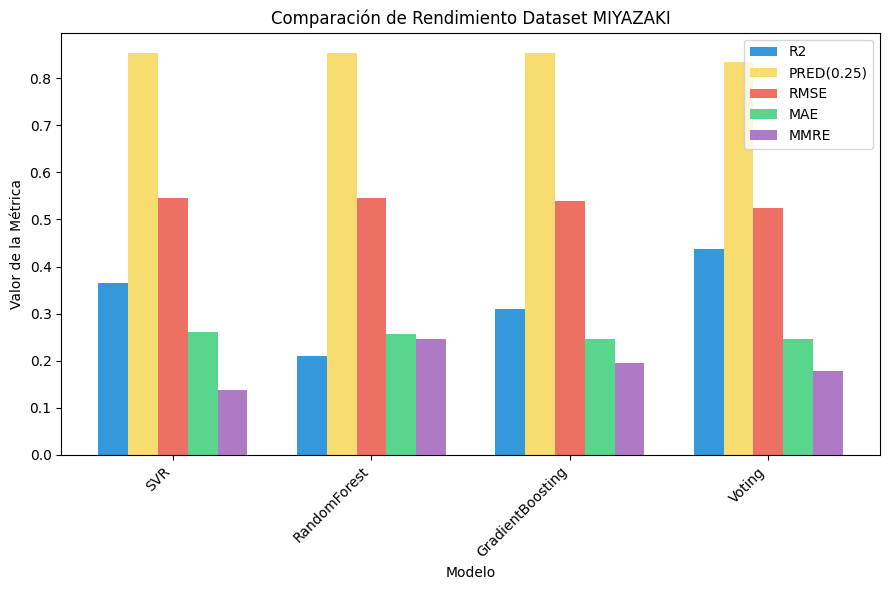

In [ ]:
metricas = ['R2', 'PRED(0.25)', 'RMSE', 'MAE', 'MMRE']
colores = ['#3498DB', '#F7DC6F','#EC7063', '#58D68D', '#AF7AC5']

num_modelos = len(score_result)
ancho_barra = 0.15
x = range(num_modelos)

plt.figure(figsize=(9, 6))

# Crear un gráfico de barras para cada métrica
for i, metrica in enumerate(metricas):
    # Calcular la posición para las barras de esta métrica
    posiciones_x = [pos + i * ancho_barra for pos in x]

    # Obtener los valores de la métrica actual
    valores_metrica = score_result[metrica]

    # Crear las barras para la métrica actual
    plt.bar(
        posiciones_x,
        valores_metrica,
        width=ancho_barra,
        label=metrica,
        color=colores[i],
    )

# Personalizar el gráfico
plt.xlabel('Modelo')
plt.ylabel('Valor de la Métrica')
plt.title('Comparación de Rendimiento Dataset MIYAZAKI')
plt.xticks([pos + (len(metricas) - 1) * ancho_barra / 2 for pos in x], score_result['Modelo'], rotation=45, ha="right")
plt.legend(loc='upper right')

# Mostrar el gráfico combinado
plt.tight_layout()
plt.show()

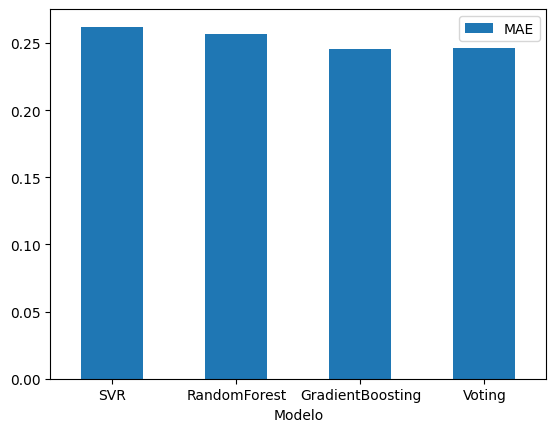

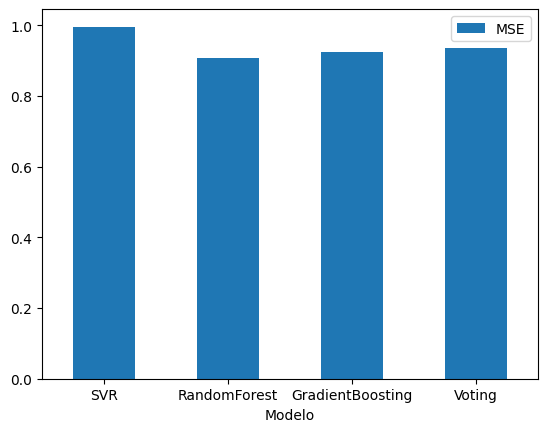

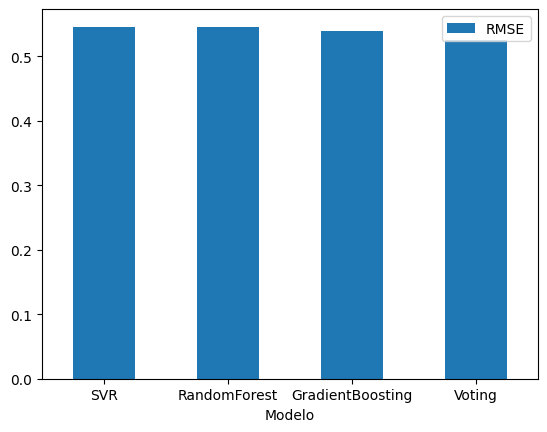

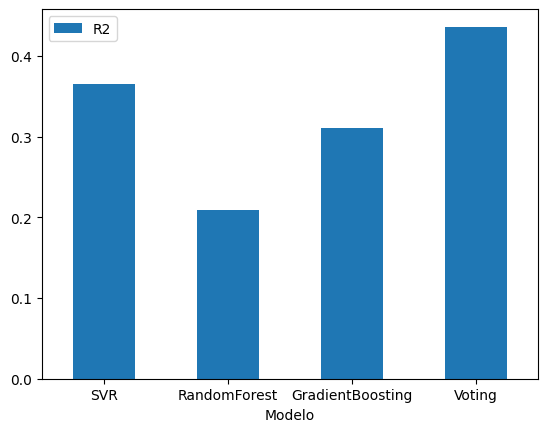

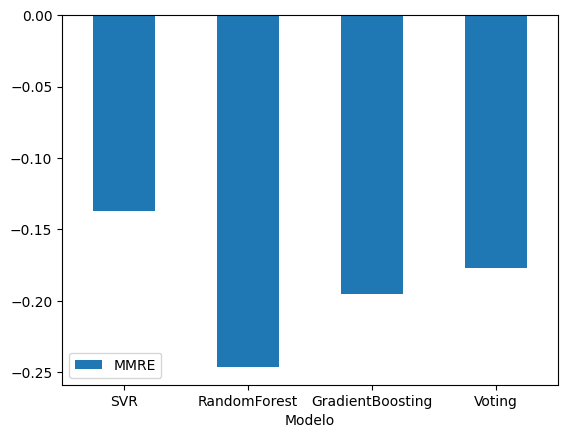

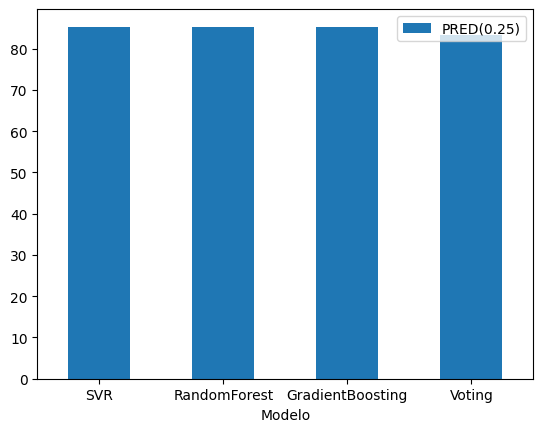

In [ ]:
variables=list(score_result)
variables.pop(0)

for var in variables:
  score_result.plot.bar(x='Modelo', y=var, rot=0)